In [936]:
import pandas as pd
from pathlib import Path
import datetime
import geopy.distance

file = str(Path.home())+"/.imp/gossip_writeup_postprocessing.csv"
df = pd.read_csv(file) 

df=df.rename(columns={'timestamp':'posix_timestamp'})
df['posix_timestamp']=df['posix_timestamp'].round(decimals=3)
GENESIS_TIME=1590537600
df['slot_timestamp']=df['slot']*12.0 + GENESIS_TIME 
df['relative_timestamp']=df['posix_timestamp']-df['slot_timestamp']

# load dht data
%store -r df_dht

display(df['posix_timestamp'].max())
display(df['slot'].max())

df = pd.merge(df, df_dht, on='peer_id', how='left',suffixes=('', '_y'))
df.drop(df.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df['is_validator']=df['subnet_ids']!='[]'

REF_LOC=(32.894970,-97.187430)
distance=[]
for coordinates in df['coordinates'].to_list():
    distance.append(geopy.distance.vincenty(coordinates, REF_LOC).km)
df['distance']=distance
df=df[df['slot']<=112867]
df.head(n=5)

1592093966.11

129697

/Users/jonny/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.


index            posix_timestamp                                    message_id                                                peer_id                                   topic  message_size    slot  proposer_index             slot_timestamp  relative_timestamp             timestamp                                                           node_id            ip4                  tcp4   udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no subnet_ids                                                                                                                                                                                                                                                   enr        coordinates  is_validator             distance
0  0     1591807044.338999986648560  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.338999986648560    2020-06-15][11:06:18  eb353d66e608aa61933fa5a2b0b16b9980065633d3abcfbef956fea87f2e1878  104.190.27.0  9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    15      [19]       enr:-LK4QH6nl7gw0UtSdYv-jgleSUvJxbBdHL22kPeXyFSRkvmGRMlXeqiv6Mf-HNgjyB8WkMhGRY4rV6oe33Qe8Y2WZNIPh2F0dG5ldHOIAAAIAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhGi-GwCJc2VjcDI1NmsxoQLz2pdBEwOy2_gyO-pGD9_6sH8W43pFeeZ5hUcME0w8woN0Y3CCIyiDdWRwgiMo  29.7633,-95.3633   True         388.187137993303224 
1  1     1591807044.556999921798706  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.556999921798706    2020-06-15][11:06:18  a08f914106b772a8a939689d6d14e50c7754df6111f9a6d4bb306afa632b18e9  3.233.217.200 9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    1       []         enr:-LK4QGLv-71xVsQ0zZq6hfpA4f3AW4vE0dWoW5jJjb-VjjxnaaoxIMIpKSJwM4pz25WCKKiFGhvQVWnYuF3CsNY5rBEBh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhAPp2ciJc2VjcDI1NmsxoQMZIaFoHuNOy1WURF3xq-M49Mg8G0i2cNpGt2j1A5gH-YN0Y3CCIyiDdWRwgiMo  36.8080,-76.0284   False        1978.708742628404480
2  2     1591807044.742000102996826  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.742000102996826    2020-06-15][11:06:18  38006854869cbddf9156a355869adefbd323273766cb2c179a13da83b45d1ce1  54.243.252.53 13000.000000000000000  13000  NaN nan   nan    113                18446744073709551615  f6775d07    5       []         enr:-LK4QKwRnRVb7lps_Q9516bAlSE-rmWYMdO8dO4GE74DiQ_ecpZ_F8I24fYCXiP1h-bitXDO0Tpr9II8QJSwU11DkUUFh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhDbz_DWJc2VjcDI1NmsxoQJjwXmPxs41IbsE-YdxM73EvSHbvyK8hCpg528lt6N6B4N0Y3CCMsiDdWRwgjLI  36.8080,-76.0284   False        1978.708742628404480
3  3     1591807044.923000097274780  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.923000097274780    2020-06-15][11:06:18  0096cdf94b72097a2accbe2f53396d97a5adbb255e3de2dcf5c856bde6dcdc85  138.68.12.21  9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    9       [13]       enr:-LK4QIqTXvroJqUG2oYGLNxQOO1ES2SdVsWZPUTX37jAotE7clLRrHgkPSiD4mAl6Yr4uehq6mLc8Jdm-677f1ccUQMJh2F0dG5ldHOIACAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhIpEDBWJc2VjcDI1NmsxoQK942L3MMtkXJCkpLKai5dKNnq5jcm7-50MqOtfqNuVxYN0Y3CCIyiDdWRwgiMo  37.3483,-121.9844  True         2306.521531147574024
4  4     1591807045.101999998092651  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu

In [854]:
import pandas as pd
from pathlib import Path
import json


file = str(Path.home())+"/.witti/afri-lh-keys.txt"
lh_keys = pd.read_csv(file,header=None)[0].to_list()

file = str(Path.home())+"/.witti/afri-prysm-keys.txt"
prysm_keys = pd.read_csv(file,header=None)[0].to_list()

file = str(Path.home())+"/.witti/afri-teku-keys.txt"
teku_keys = pd.read_csv(file,header=None)[0].to_list()

afrikeys_to_client = dict.fromkeys(lh_keys , 'lighthouse')
afrikeys_to_client.update(dict.fromkeys(prysm_keys , 'prysm'))
afrikeys_to_client.update(dict.fromkeys(teku_keys , 'teku'))

with open(str(Path.home())+"/.witti/pubkeys.json") as json_file: 
    pubkeys_to_indexes = json.load(json_file) 
    

df_validator_registry = pd.DataFrame({'index' : list(pubkeys_to_indexes.values()),'pubkey' : list(pubkeys_to_indexes.keys())})

clients=[]
is_afrikeys=[]
for key in df_validator_registry['pubkey'].to_list():
    if key in afrikeys_to_client:
        is_afrikeys.append(1)
        clients.append(afrikeys_to_client[key])
    else:
        is_afrikeys.append(0)
        clients.append('unknown')
    

df_validator_registry['is_afri_key']=is_afrikeys
df_validator_registry['client']=clients


#known dht entries for afri's ip
df_dht[df_dht["ip4"]=="176.9.51.216"]
#afri's nodes that we recv gossip data from
set(list(df[df["ip4"]=="176.9.51.216"]["peer_id"].to_list()))

{'16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP',
 '16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU'}

In [855]:
# basics numbers
start_slot = df['slot'].min()
end_slot = df['slot'].max()
print("Starting slot: {}".format(start_slot))
print("Ending slot: {}".format(end_slot))
print("Number of slots: {}".format(end_slot-start_slot))
num_messages = len(df)
print("Number of messages: {}".format(num_messages))
print("Average number of messages per slot: {}".format(num_messages/(end_slot-start_slot)))
print("Number of messages from validating nodes: {}".format((len(df[df['is_validator']==True]))))
print("Number of messages from non-validating nodes: {}".format((len(df[df['is_validator']==False]))))
peers=set(df['peer_id'])
print("Number of peers: {}".format((len(peers))))
validating_peers=set(df[df['is_validator']==True]['peer_id'].to_list())
print("Number of peers validating: {}".format((len(validating_peers))))
non_validating_peers=set(df[df['is_validator']==False]['peer_id'].to_list())
print("Number of peers not validating: {}".format((len(non_validating_peers))))

block_slots_received = set(df['slot'].to_list())
slots=set(range(df['slot'].min(),df['slot'].max()))
print("Number of missing block slots:", len(slots.difference(block_slots_received)), "of", df['slot'].max()-df['slot'].min()) 
 

Starting slot: 105787
Ending slot: 112867
Number of slots: 7080
Number of messages: 82760
Average number of messages per slot: 11.689265536723164
Number of messages from validating nodes: 49437
Number of messages from non-validating nodes: 33323
Number of peers: 17
Number of peers validating: 11
Number of peers not validating: 6
Number of missing block slots: 1512 of 7080


In [856]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.15f' % x)


pd.reset_option('display.max_rows')



In [857]:
df.groupby(['proposer_index','message_id','slot','message_size'])['relative_timestamp'].describe()

count              mean               std               min               25%               50%               75%               max
proposer_index message_id                                   slot   message_size                                                                                                                                                 
0              SYlj3rrSBg3maTujnBQcy4P9NfhFmBx3RvFIbGdTDtU= 106709 1112         17.000000000000000 1.612999986199772 0.743228239695066 0.400000095367432 1.052999973297119 1.601999998092651 2.194000005722046 2.773999929428101
               ecJMoDX-mEqBo9MVeCMLTuPdfRkh8CmtH6IvNgUyi3g= 112350 876          13.000000000000000 1.054230745022114 0.406055644654907 0.414999961853027 0.746000051498413 1.053999900817871 1.365999937057495 1.677000045776367
               l1VzL6gVwEKeJrEqoMxazqmv8nlV7LiDyp7aXs-TWBE= 109265 640          15.000000000000000 0.975866667429606 0.454027963521259 0.372999906539917 0.662500023841858 0.930999994277954 1.199499964714050 2.168999910354614
               qAsFh-2CNQ0qie1O3x_jTn4BQd7gmEil9pTpq5gS0ag= 109574 876          14.000000000000000 1.124000004359654 0.445063518479868 0.407999992370605 0.783749997615814 1.126499891281128 1.468749940395355 1.812000036239624
               x-t_szLNfJLfVCbI_H2ytxDsktajIWNOF_NNUpGvc5U= 110717 876          14.000000000000000 1.163285732269287 0.518662982400192 0.408999919891357 0.769250035285950 1.125000000000000 1.483999967575073 2.095999956130981
...                                                                                            ...               ...               ...               ...               ...               ...               ...               ...
917            g1t1J9cVa2Pbqh-hT3NsBa5k9YF3rSdeY2Tss7pjAzo= 110175 640          14.000000000000000 0.852357166154044 0.324010327451106 0.338000059127808 0.603000104427338 0.853500008583069 1.104500055313110 1.352999925613403
               kX9U06-TKiw8h0WrXn-xcbhyE0Zd6Dd_bHyv_WGVZho= 111197 1112         14.000000000000000 1.364285690443856 0.561776653331954 0.477999925613403 0.924250006675720 1.373999953269958 1.798000037670135 2.236999988555908
918            89L_nUfqIMZGjC_uQF85EyMbUkagDY8VJ5JOFAr_588= 112218 640          14.000000000000000 0.868357147489275 0.336290973967777 0.334000110626221 0.605000019073486 0.878499984741211 1.128750026226044 1.382999897003174
               K2v1Oi9HmbXGYVfW5NhByGCqtCAJ59FBDhyHn1JDlc8= 110373 876          14.000000000000000 1.251214299883161 0.520255734721843 0.315000057220459 0.911750018596649 1.307999968528748 1.645250022411346 1.984999895095825
               wNZLOM_hWdcI2ze_s7E5xkxZsZBqkW89ZFdshUupVQ4= 111716 1584         14.000000000000000 1.735928620610918 0.759008749428107 0.543999910354614 1.149250090122223 1.736999988555908 2.325750052928925 2.913000106811523

[5569 rows x 8 columns]

In [858]:
grouped_df = df.groupby(['proposer_index','message_id','slot','message_size']).agg({'relative_timestamp':['count','std','min','max']})
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df = grouped_df.reset_index()
grouped_df

proposer_index                                    message_id    slot  message_size  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max
0     0               SYlj3rrSBg3maTujnBQcy4P9NfhFmBx3RvFIbGdTDtU=  106709  1112          17                       0.743228239695066       0.400000095367432       2.773999929428101      
1     0               ecJMoDX-mEqBo9MVeCMLTuPdfRkh8CmtH6IvNgUyi3g=  112350  876           13                       0.406055644654907       0.414999961853027       1.677000045776367      
2     0               l1VzL6gVwEKeJrEqoMxazqmv8nlV7LiDyp7aXs-TWBE=  109265  640           15                       0.454027963521259       0.372999906539917       2.168999910354614      
3     0               qAsFh-2CNQ0qie1O3x_jTn4BQd7gmEil9pTpq5gS0ag=  109574  876           14                       0.445063518479868       0.407999992370605       1.812000036239624      
4     0               x-t_szLNfJLfVCbI_H2ytxDsktajIWNOF_NNUpGvc5U=  110717  876           14                       0.518662982400193       0.408999919891357       2.095999956130981      
...  ..                                                        ...     ...  ...           ..                                     ...                     ...                     ...      
5564  917             g1t1J9cVa2Pbqh-hT3NsBa5k9YF3rSdeY2Tss7pjAzo=  110175  640           14                       0.324010327451106       0.338000059127808       1.352999925613403      
5565  917             kX9U06-TKiw8h0WrXn-xcbhyE0Zd6Dd_bHyv_WGVZho=  111197  1112          14                       0.561776653331954       0.477999925613403       2.236999988555908      
5566  918             89L_nUfqIMZGjC_uQF85EyMbUkagDY8VJ5JOFAr_588=  112218  640           14                       0.336290973967777       0.334000110626221       1.382999897003174      
5567  918             K2v1Oi9HmbXGYVfW5NhByGCqtCAJ59FBDhyHn1JDlc8=  110373  876           14                       0.520255734721843       0.315000057220459       1.984999895095825      
5568  918             wNZLOM_hWdcI2ze_s7E5xkxZsZBqkW89ZFdshUupVQ4=  111716  1584          14                       0.759008749428107       0.543999910354614       2.913000106811523      

[5569 rows x 8 columns]

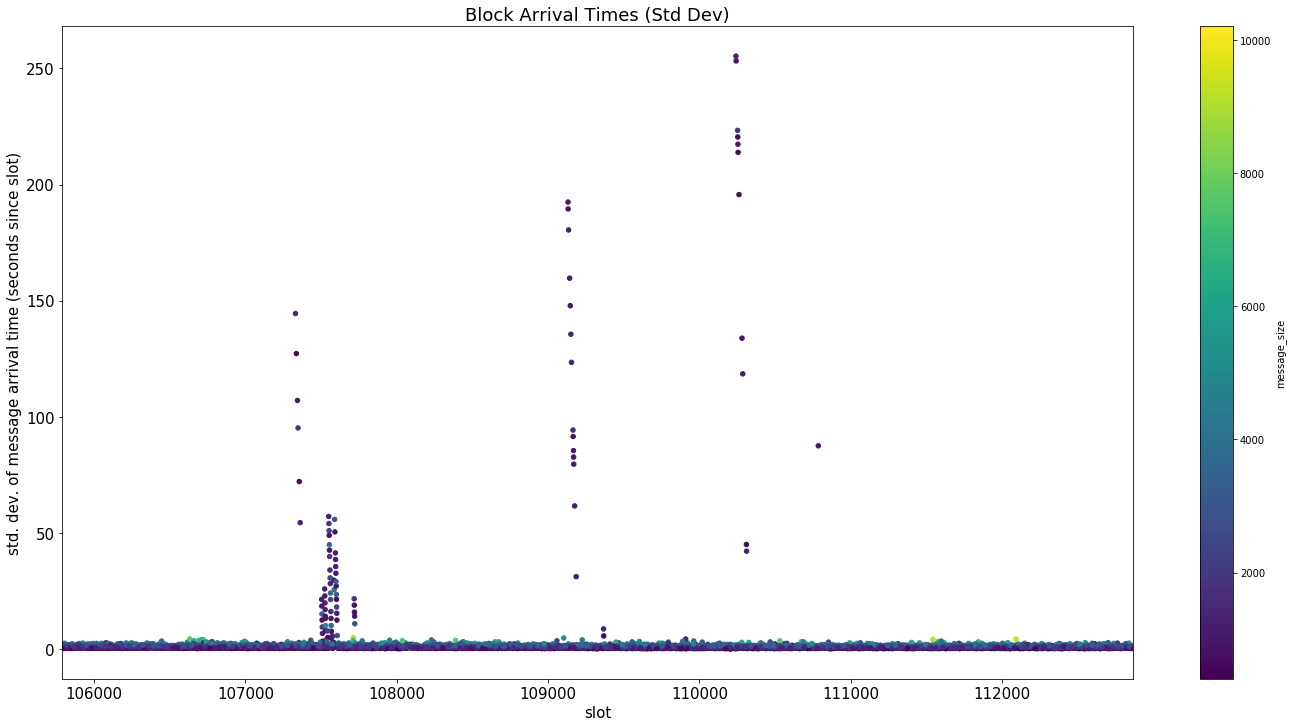

In [859]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (grouped_df['slot'].min(),grouped_df['slot'].max())
ax=grouped_df.plot.scatter(x='slot',y='relative_timestamp_std',c='message_size',colormap='viridis',xlim=xlim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times (Std Dev)",fontsize=18)
ax.set_xlabel("slot",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax=ax.set_ylabel("std. dev. of message arrival time (seconds since slot)",fontsize=15)

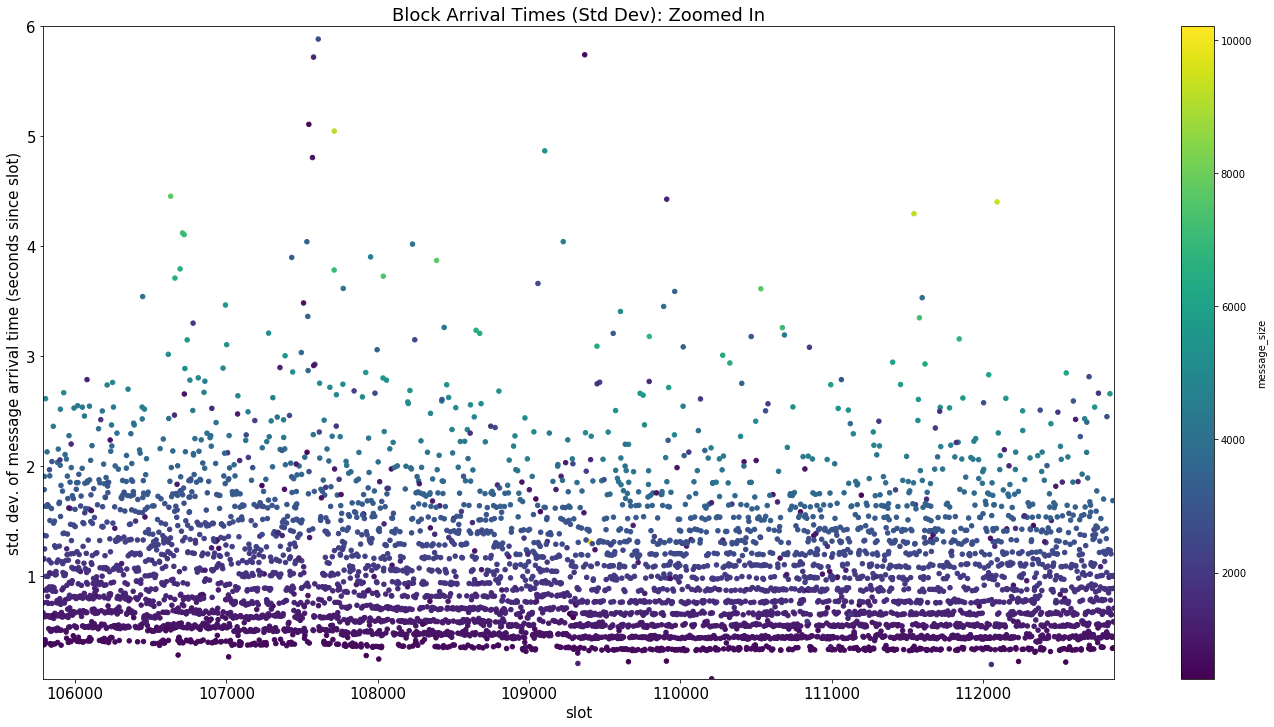

In [860]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (grouped_df['slot'].min(),grouped_df['slot'].max())
ylim = (grouped_df['relative_timestamp_std'].min(),6)
ax=grouped_df.plot.scatter(x='slot',y='relative_timestamp_std',c='message_size',colormap='viridis',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times (Std Dev): Zoomed In",fontsize=18)
ax.set_xlabel("slot",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax=ax.set_ylabel("std. dev. of message arrival time (seconds since slot)",fontsize=15)

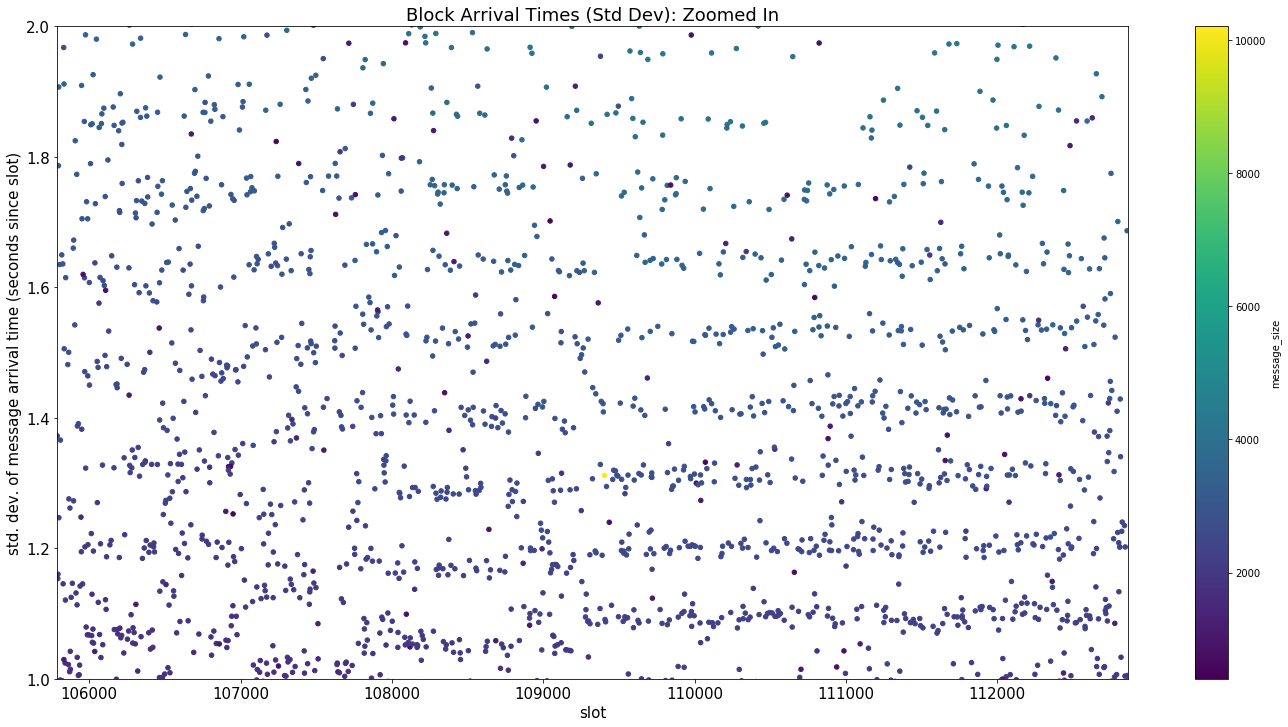

In [861]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (grouped_df['slot'].min(),grouped_df['slot'].max())
ylim = (1,2)
ax=grouped_df.plot.scatter(x='slot',y='relative_timestamp_std',c='message_size',colormap='viridis',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times (Std Dev): Zoomed In",fontsize=18)
ax.set_xlabel("slot",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax=ax.set_ylabel("std. dev. of message arrival time (seconds since slot)",fontsize=15)

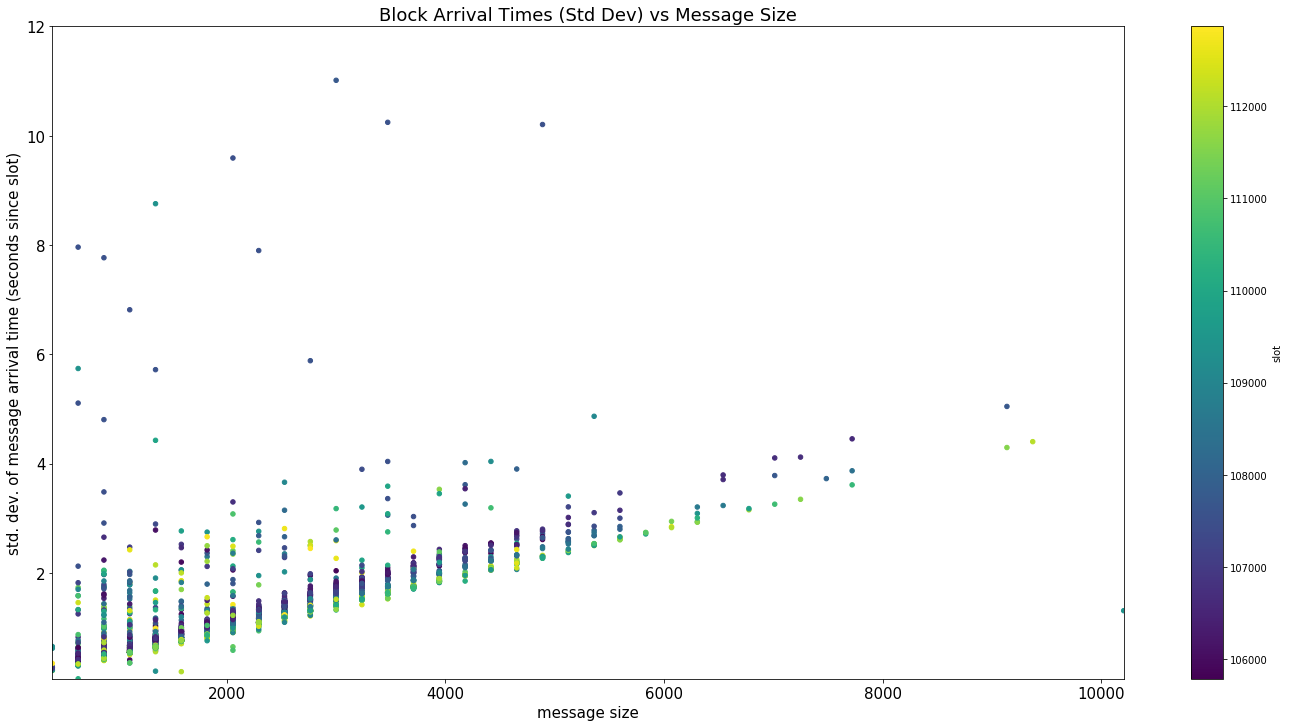

In [862]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (grouped_df['message_size'].min(),grouped_df['message_size'].max())
ylim = (grouped_df['relative_timestamp_std'].min(),12)
ax=grouped_df.plot.scatter(x='message_size',y='relative_timestamp_std',c='slot',colormap='viridis',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times (Std Dev) vs Message Size",fontsize=18)
ax.set_xlabel("message size",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax=ax.set_ylabel("std. dev. of message arrival time (seconds since slot)",fontsize=15)

In [947]:
df_grouped_message_size = df[df['relative_timestamp']<12].groupby(['message_size']).agg({'relative_timestamp':['count','std','min','max']})
df_grouped_message_size.columns = ['_'.join(col).strip() for col in df_grouped_message_size.columns.values]
df_grouped_message_size = df_grouped_message_size.reset_index()
df_grouped_message_size

message_size  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max
0   404           149                      0.424136384442785       0.234999895095825       3.569000005722046      
1   640           7288                     0.732057391382213       -0.068000078201294      9.312000036239624      
2   876           13585                    0.973521357099362       -0.154999971389771      11.864000082015991     
3   1112          10805                    1.123301285212218       -0.348000049591064      11.309000015258789     
4   1348          8284                     1.149009436823877       -0.352999925613403      11.980000019073486     
5   1584          6431                     1.314662525882664       -0.398999929428101      11.375999927520752     
6   1820          5416                     1.559298166034276       -0.217000007629395      11.959000110626221     
7   2056          4939                     1.771402727771885       -0.391000032424927      11.746999979019165     
8   2292          4389                     1.682877489996216       -0.362999916076660      11.809999942779541     
9   2528          4138                     1.820218231274388       -0.075000047683716      11.303999900817871     
10  2764          3322                     1.917945441822226       -0.115000009536743      11.562000036239624     
11  3000          3359                     2.138255089223555       0.063999891281128       11.894999980926514     
12  3236          2624                     2.112799281870136       -0.022000074386597      11.834000110626221     
13  3472          2061                     2.173122310959538       -0.200999975204468      11.992000102996826     
14  3708          1408                     2.319541431808021       0.125000000000000       11.967000007629395     
15  3944          1138                     2.353551446934144       -0.059999942779541      11.897000074386597     
16  4180          649                      2.638543254760006       -0.022000074386597      11.835999965667725     
17  4416          680                      2.456095643218142       0.398000001907349       11.592000007629395     
18  4652          398                      2.634889006135321       0.437999963760376       11.822000026702881     
19  4888          326                      2.671955885851033       0.407000064849854       11.943000078201294     
20  5124          280                      2.851147679320929       0.431999921798706       11.813999891281128     
21  5360          210                      2.828188229459207       0.411999940872192       11.890000104904175     
22  5596          160                      2.836152698325813       0.387000083923340       11.986000061035156     
23  5832          42                       2.818870988211903       0.667000055313110       11.244999885559082     
24  6068          42                       2.920801552418352       0.466000080108643       11.052999973297119     
25  6304          67                       2.891647290425113       0.730000019073486       11.767999887466431     
26  6540          41                       3.111250261345702       0.484999895095825       11.957000017166138     
27  6776          25                       2.787430398036240       2.809000015258789       11.875000000000000     
28  7012          38                       3.090518864071835       0.615000009536743       11.903000116348267     
29  7248          25                       3.026678780022103       1.569999933242798       11.950000047683716     
30  7484          14                       3.483663816771522       1.052000045776367       11.898000001907349     
31  7720          35                       2.981746450897461       1.726999998092651       11.588999986648560     
32  9136          19                       2.886945007989373       2.644000053405762       11.799000024795532     
33  9372          10                       3.172099536417297       2.288000106811523       11.

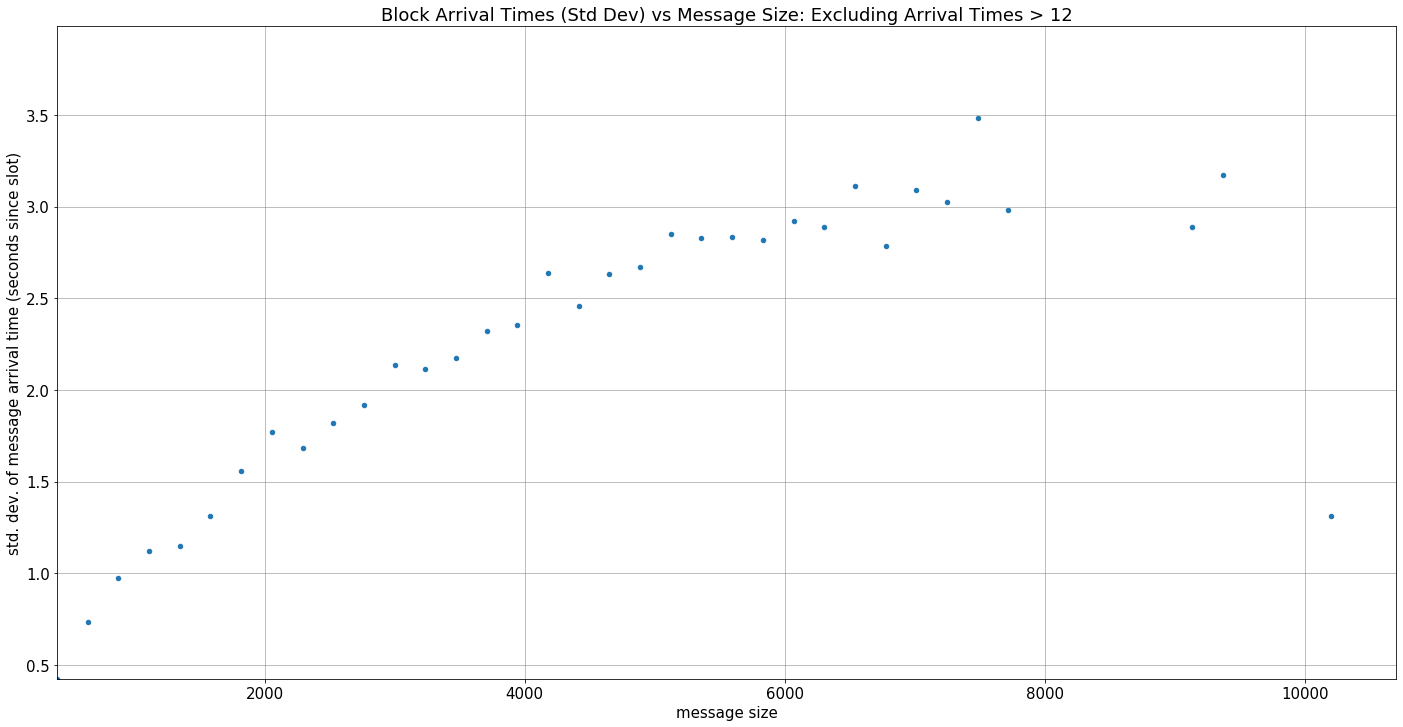

In [949]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (df_grouped_message_size['message_size'].min(),df_grouped_message_size['message_size'].max()+500)
ylim = (df_grouped_message_size['relative_timestamp_std'].min(),df_grouped_message_size['relative_timestamp_std'].max()+.5)
ax=df_grouped_message_size.plot.scatter(x='message_size',y='relative_timestamp_std',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times (Std Dev) vs Message Size: Excluding Arrival Times > 12",fontsize=18)
ax.set_xlabel("message size",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
plt.grid(b=True,linestyle='-', linewidth='0.5', color='grey',which='both')
ax=ax.set_ylabel("std. dev. of message arrival time (seconds since slot)",fontsize=15)

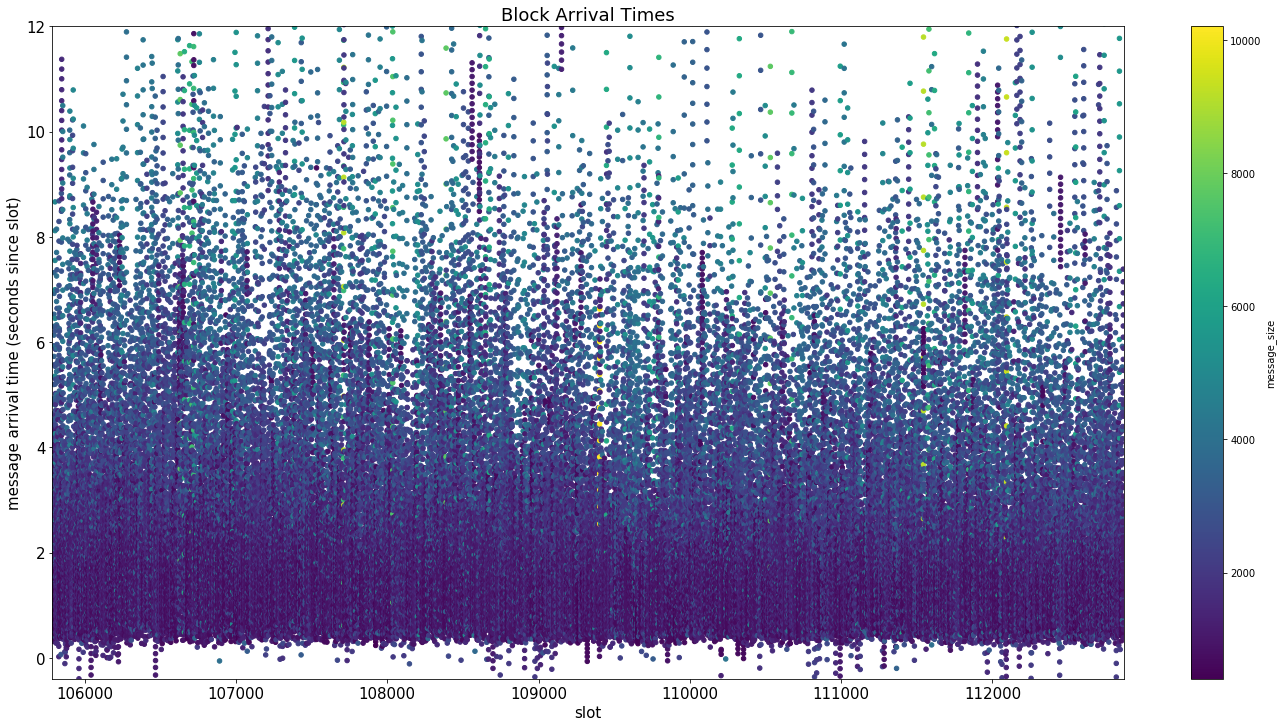

In [903]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (df['slot'].min(),df['slot'].max())
ylim = (df['relative_timestamp'].min(),12)
ax=df.plot.scatter(x='slot',y='relative_timestamp',c='message_size',colormap='viridis',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times",fontsize=18)
ax.set_xlabel("slot",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax=ax.set_ylabel("message arrival time (seconds since slot)",fontsize=15)

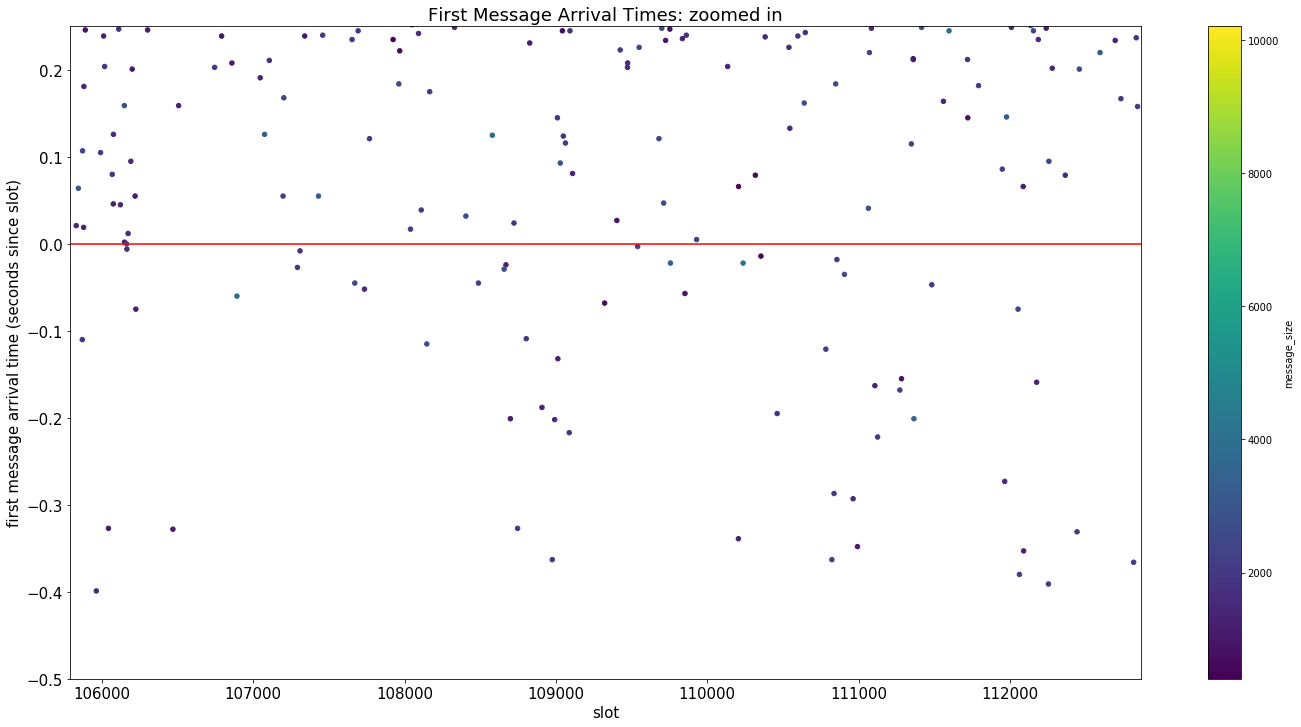

In [904]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (grouped_df['slot'].min(),grouped_df['slot'].max())
ylim = (-.5,.25)
ax=grouped_df.plot.scatter(x='slot',y='relative_timestamp_min',c='message_size',colormap='viridis',ylim=ylim,xlim=xlim,figsize=(24,12),ax=ax)
ax.set_title("First Message Arrival Times: zoomed in",fontsize=18)
ax.set_xlabel("slot",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax.set_ylabel("first message arrival time (seconds since slot)",fontsize=15)
ax=ax.axhline(y=0.0, color='r', linestyle='-')

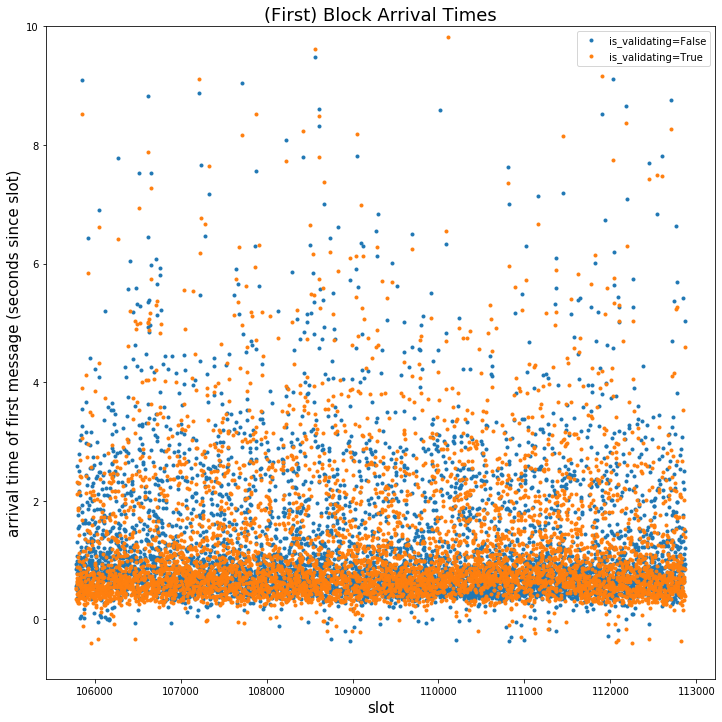

In [867]:
import matplotlib.pyplot as plt

df_grouped_is_validator = df.groupby(['proposer_index','message_id','slot','is_validator']).agg({'relative_timestamp':['count','std','min','max']})
df_grouped_is_validator.columns = ['_'.join(col).strip() for col in df_grouped_is_validator.columns.values]
df_grouped_is_validator = df_grouped_is_validator.reset_index()


groups = df_grouped_is_validator.groupby('is_validator')

# Plot
fig, ax = plt.subplots(figsize=(12,12))
ax.margins(0.05) 
for name, group in groups:
    ax.plot(group.slot, group.relative_timestamp_min, marker='.', linestyle='', label="is_validating="+str(name))
ax.legend()
ax.set_ylim(-1,10)
ax.set_title("(First) Block Arrival Times",fontsize=18)
plt.ylabel("arrival time of first message (seconds since slot)",fontsize=15)
plt.xlabel("slot",fontsize=15)
plt.show()



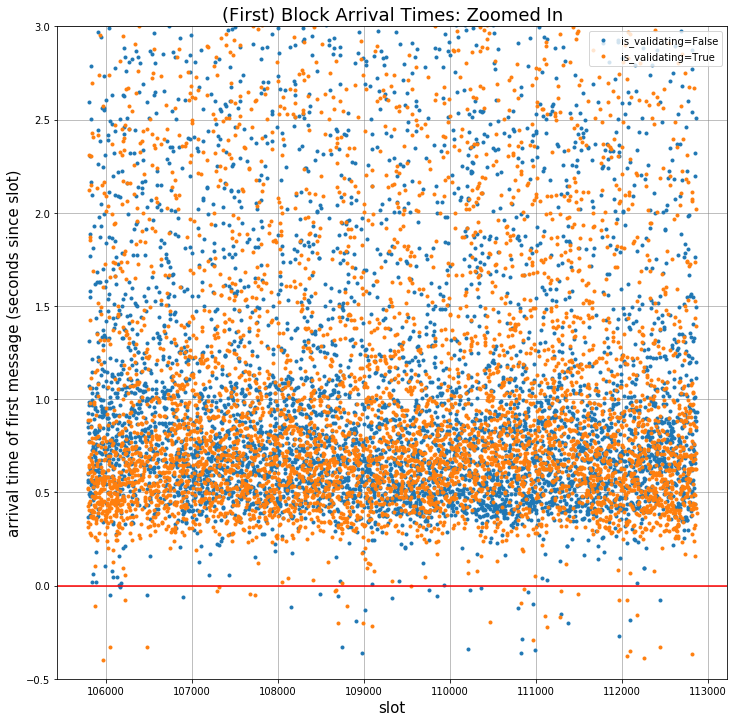

In [868]:
import matplotlib.pyplot as plt

# Plot
fig, ax = plt.subplots(figsize=(12,12))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.slot, group.relative_timestamp_min, marker='.', linestyle='', label="is_validating="+str(name))
ax.legend(loc='upper right')
ax.set_title("(First) Block Arrival Times: Zoomed In",fontsize=18)
ax.set_ylim(-.5,3)
ax=ax.axhline(y=0.0, color='r', linestyle='-')
plt.ylabel("arrival time of first message (seconds since slot)",fontsize=15)
plt.xlabel("slot",fontsize=15)
plt.grid(b=True,linestyle='-', linewidth='0.5', color='grey',which='both')
plt.show()

In [869]:
df[df['relative_timestamp']<=12].groupby(['is_validator'])['relative_timestamp'].describe()

count              mean               std                min               25%               50%               75%                max
is_validator                                                                                                                                                      
False        33218.000000000000000 2.383362303743931 1.836648594840396 -0.362999916076660 1.105000019073486 1.816999912261963 3.059749960899353 11.992000102996826
True         49194.000000000000000 2.697271598181686 1.922962227608690 -0.398999929428101 1.351000070571899 2.140000104904175 3.510749936103821 12.000000000000000

In [870]:
df_outer = pd.merge(df, grouped_df, on='message_id', how='outer',suffixes=('', '_y'))
df_outer.drop(df_outer.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_outer

index            posix_timestamp                                    message_id                                                peer_id                                   topic  message_size    slot  proposer_index             slot_timestamp  relative_timestamp             timestamp                                                           node_id             ip4                  tcp4   udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no                                                                                                                                                                                                                                              subnet_ids                                                                                                                                                                                                                                                   enr        coordinates  is_validator             distance  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max
0      0     1591807044.338999986648560  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.338999986648560    2020-06-15][11:06:18  eb353d66e608aa61933fa5a2b0b16b9980065633d3abcfbef956fea87f2e1878  104.190.27.0   9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    15      [19]                                                                                                                                                                                                                                                    enr:-LK4QH6nl7gw0UtSdYv-jgleSUvJxbBdHL22kPeXyFSRkvmGRMlXeqiv6Mf-HNgjyB8WkMhGRY4rV6oe33Qe8Y2WZNIPh2F0dG5ldHOIAAAIAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhGi-GwCJc2VjcDI1NmsxoQLz2pdBEwOy2_gyO-pGD9_6sH8W43pFeeZ5hUcME0w8woN0Y3CCIyiDdWRwgiMo  29.7633,-95.3633   True         388.187137993303224   16                       0.867455246658940       0.338999986648560       3.095000028610229      
1      1     1591807044.556999921798706  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.556999921798706    2020-06-15][11:06:18  a08f914106b772a8a939689d6d14e50c7754df6111f9a6d4bb306afa632b18e9  3.233.217.200  9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    1       []                                                                                                                                                                                                                                                      enr:-LK4QGLv-71xVsQ0zZq6hfpA4f3AW4vE0dWoW5jJjb-VjjxnaaoxIMIpKSJwM4pz25WCKKiFGhvQVWnYuF3CsNY5rBEBh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhAPp2ciJc2VjcDI1NmsxoQMZIaFoHuNOy1WURF3xq-M49Mg8G0i2cNpGt2j1A5gH-YN0Y3CCIyiDdWRwgiMo  36.8080,-76.0284   False        1978.708742628404480  16                       0.867455246658940       0.338999986648560       3.095000028610229      
2      2     1591807044.742000102996826  9WtIplZjSF9rhTpJ3cPv8RWpIz29fxZvvMPc-rw-qes=  16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe  /eth2/f6775d07/beacon_block/ssz_snappy  1584          105787  492            1591807044.000000000000000 0.742000102996826    2020-06-15][11:06:18  38006854869cbddf9156a355869adefbd323273766cb2c179a13da83b45d1ce1  54.243.252.53  13000.000000000000000  13000  NaN nan   nan    113                18446744073709551615  f6775d07    5       []                                                                                                                                                              

In [871]:

pd.reset_option('display.max_rows')
df_first = df_outer.sort_values('relative_timestamp',ascending=True).groupby('message_id').first().reset_index()
df_first[df_first["relative_timestamp_min"]!=df_first["relative_timestamp"]]

Empty DataFrame
Columns: [message_id, index, posix_timestamp, peer_id, topic, message_size, slot, proposer_index, slot_timestamp, relative_timestamp, timestamp, node_id, ip4, tcp4, udp4, ip6, tcp6, udp6, next_fork_version, next_fork_epoch, fork_digest, seq_no, subnet_ids, enr, coordinates, is_validator, distance, relative_timestamp_count, relative_timestamp_std, relative_timestamp_min, relative_timestamp_max]
Index: []

In [872]:
df_first_message_size_timestamp = df_first[df_first['relative_timestamp']<4].groupby(['message_size','proposer_index']).agg({'relative_timestamp':['count','std','min','max']})
df_first_message_size_timestamp.columns = ['_'.join(col).strip() for col in df_first_message_size_timestamp.columns.values]
df_first_message_size_timestamp = df_first_message_size_timestamp.reset_index()
df_first_message_size_timestamp.head()

message_size  proposer_index  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max
0  404           1               1                        nan                     0.404999971389771       0.404999971389771      
1  404           14              1                        nan                     0.359999895095825       0.359999895095825      
2  404           15              1                        nan                     0.362999916076660       0.362999916076660      
3  404           73              3                        0.023860732763933       0.234999895095825       0.280999898910522      
4  404           788             1                        nan                     0.325999975204468       0.325999975204468

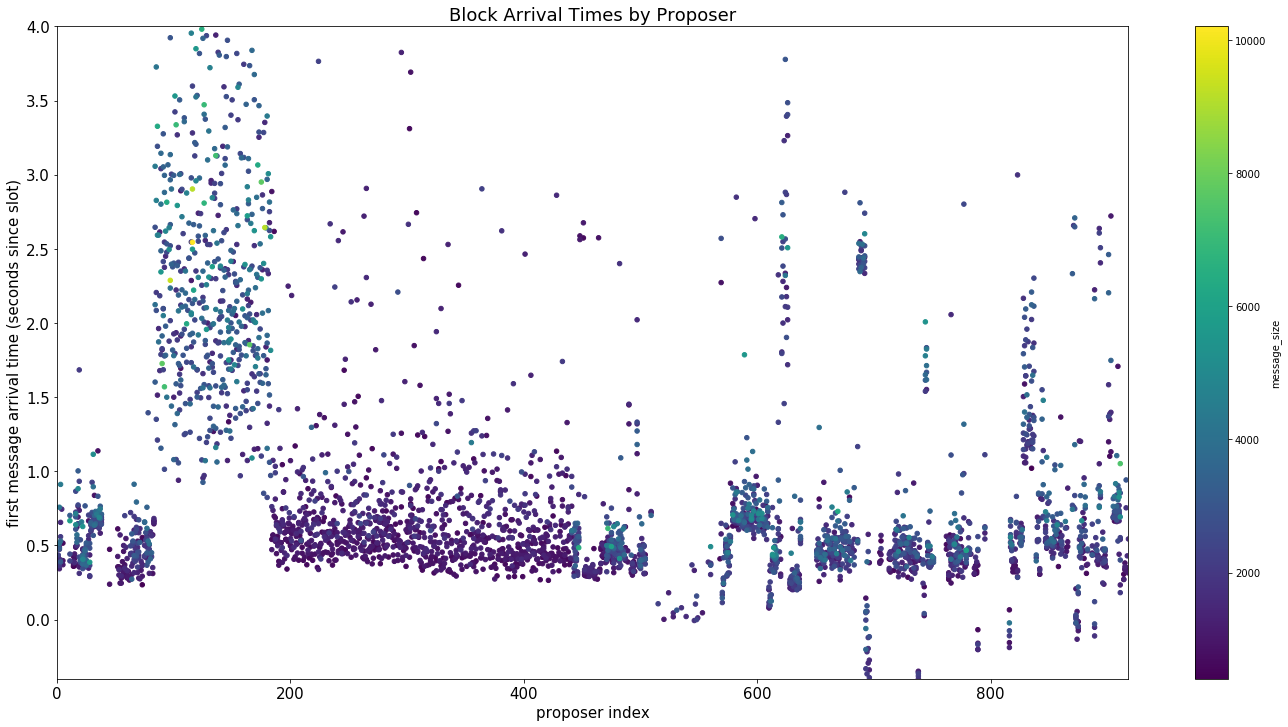

In [873]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (df_first_message_size_timestamp['proposer_index'].min(),df_first_message_size_timestamp['proposer_index'].max())
ylim = (df_first_message_size_timestamp['relative_timestamp_min'].min(),4)
ax=df_first_message_size_timestamp.plot.scatter(x='proposer_index',y='relative_timestamp_min',c='message_size',colormap='viridis',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Block Arrival Times by Proposer",fontsize=18)
ax.set_xlabel("proposer index",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
ax=ax.set_ylabel("first message arrival time (seconds since slot)",fontsize=15)

In [909]:
df_first_message_size = df_first.groupby(['message_size']).agg({'message_size':['count']})
df_first_message_size.columns = ['_'.join(col).strip() for col in df_first_message_size.columns.values]
df_first_message_size = df_first_message_size.reset_index()
df_first_message_size.head()

message_size  message_size_count
0  404           11                
1  640           491               
2  876           916               
3  1112          725               
4  1348          561

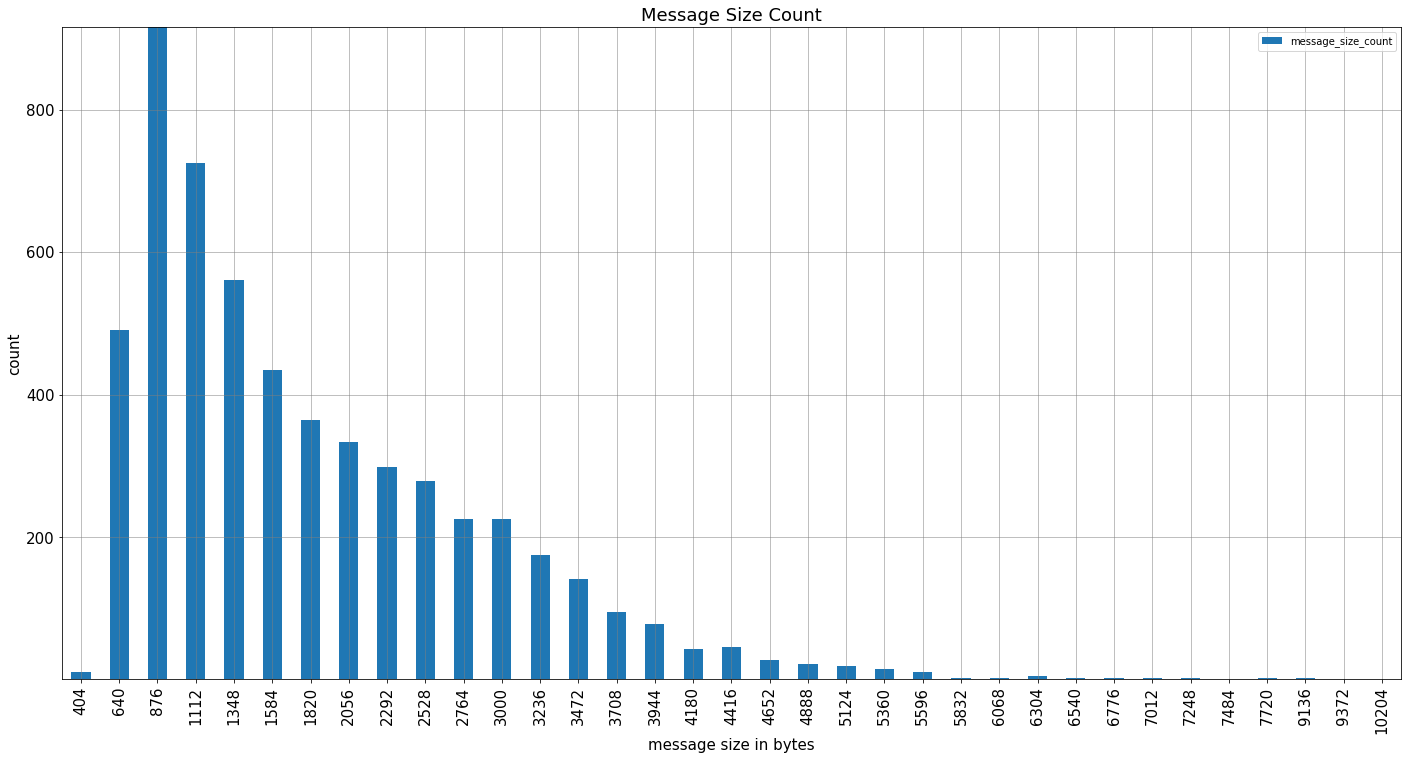

In [911]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (df_first_message_size['message_size'].min(),df_first_message_size['message_size'].max())
ylim = (df_first_message_size['message_size_count'].min(),df_first_message_size['message_size_count'].max())
ax=df_first_message_size.plot(kind='bar',x='message_size',y='message_size_count',xlim=xlim,ylim=ylim,figsize=(24,12),ax=ax)
ax.set_title("Message Size Count",fontsize=18)
ax.set_xlabel("message size in bytes",fontsize=15)
ax.tick_params(axis = "both", labelsize=15)
plt.grid(b=True,linestyle='-', linewidth='0.5', color='grey',which='both')
ax=ax.set_ylabel("count",fontsize=15)

In [876]:
df_first.groupby(['is_validator'])['relative_timestamp'].describe()

count              mean               std                min               25%               50%               75%                 max
is_validator                                                                                                                                                      
False        2199.000000000000000 1.029914506189711 1.107054793613236 -0.362999916076660 0.450500011444092 0.586999893188477 1.052500009536743 11.187000036239624 
True         3370.000000000000000 1.173410089291875 5.842584649517996 -0.398999929428101 0.467000007629395 0.647000074386597 1.089999914169312 281.055999994277954

Text(0.5, 0, 'proposer index')

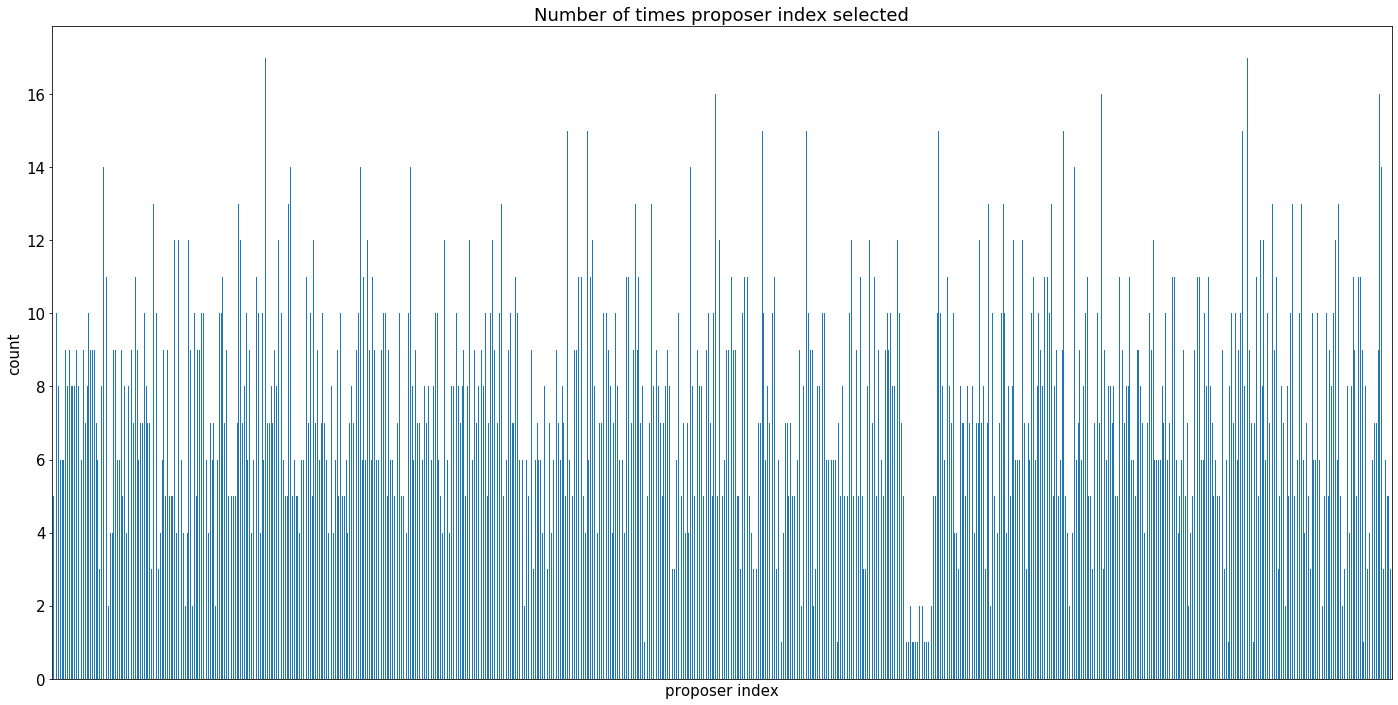

In [877]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Number of times proposer index selected",fontsize=18)

ax=df_first.groupby('proposer_index').size().plot(kind='bar',figsize=(24,12))
ax.tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
ax=ax.tick_params(axis = "y", labelsize=15)
plt.ylabel("count",fontsize=15)
plt.xlabel("proposer index",fontsize=15)

Text(0.5, 0, 'proposer index')

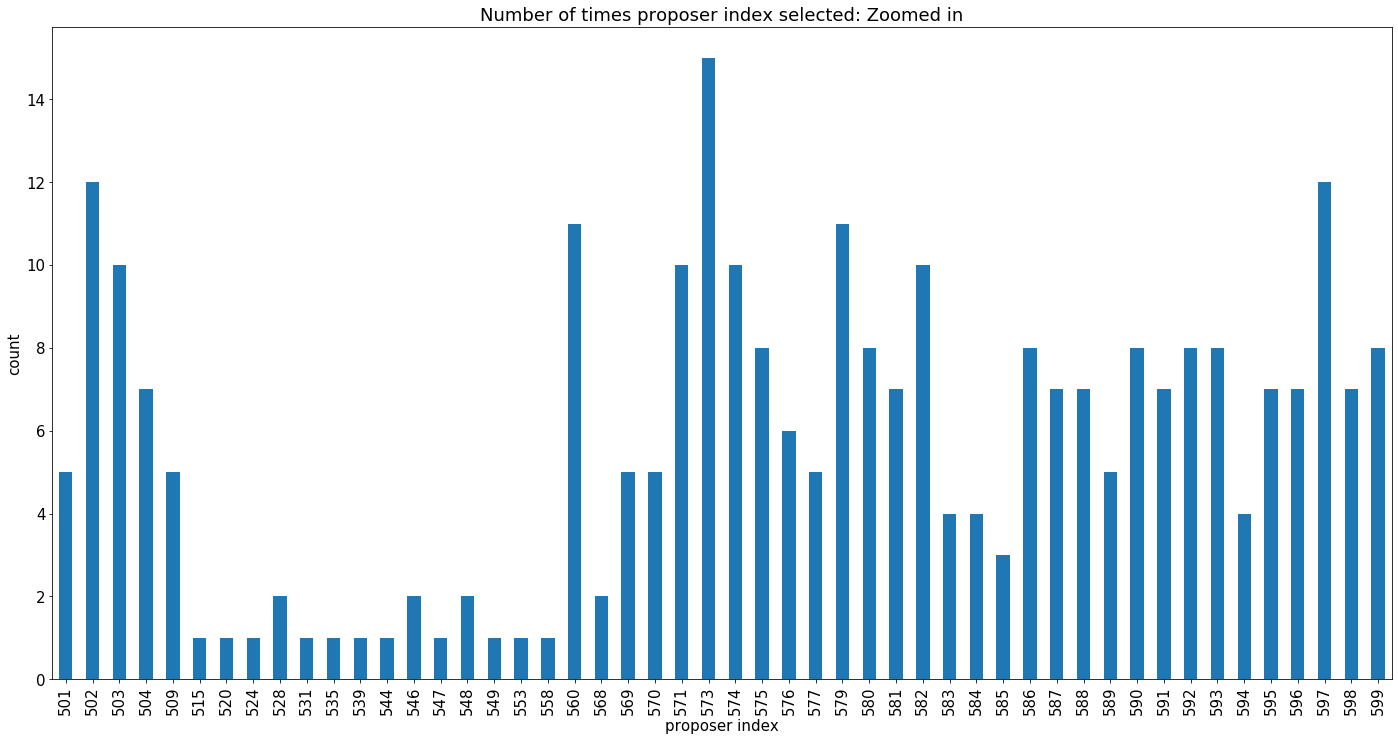

In [878]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Number of times proposer index selected: Zoomed in",fontsize=18)

ax=df_first[(df_first['proposer_index']>500)&(df_first['proposer_index']<600)].groupby('proposer_index').size().plot(kind='bar',figsize=(24,12))
ax=ax.tick_params(axis = "both", labelsize=15)
plt.ylabel("count",fontsize=15)
plt.xlabel("proposer index",fontsize=15)

In [879]:
df_prop_index = df_first.groupby('proposer_index')['peer_id'].apply(lambda peer_ids: ','.join(set(peer_ids))).to_frame()
df_prop_index['num_different_peers_first']=df_first.groupby('proposer_index')['peer_id'].nunique()
df_prop_index['num_times_proposed']=df_first.groupby('proposer_index').size()
df_prop_index.sort_values('num_times_proposed',ascending=False)

peer_id  num_different_peers_first  num_times_proposed
proposer_index                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
821             16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa                                                        7                          17                
140             16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr,16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu,16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr,16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m,16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe  8                          17                
910             16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m,16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  8                          16                
679             16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr,16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb,16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv,16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L  8                          16                
1               16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e,16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU,16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe,16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr,16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L,16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m                                                                                                              6                          16                
...                                                                                                                                                                                                                                                                                                                                                                                                                                                         ... ..                          ..                
531             16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L                                                                                                                                                                                                                                                                                                                                                                                            1                          1   

In [880]:
peer_validator_map={}
for peer,is_validator in zip(df_first['peer_id'].to_list(),df_first['is_validator'].to_list()):
    peer_validator_map[peer]=is_validator
    
df_always_first = df_prop_index[(df_prop_index['num_different_peers_first']!=df_prop_index['num_times_proposed'])&(df_prop_index['num_different_peers_first']==1)].reset_index()
display(len(df_always_first))
is_validator=[]
for peer in df_always_first['peer_id'].to_list():
    is_validator.append(peer_validator_map[peer])
df_always_first['is_peer_validator']=is_validator
df_always_first[df_always_first['is_peer_validator']==True].sort_values('num_times_proposed',ascending=False)





80

proposer_index                                                peer_id  num_different_peers_first  num_times_proposed  is_peer_validator
58  454             16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m  1                          12                  True             
11  206             16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  1                          10                  True             
45  281             16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  1                          10                  True             
19  220             16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  1                          10                  True             
38  266             16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  1                          10                  True             
..  ...                                                               ... ..                          ..                   ...             
71  603             16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U  1                          2                   True             
72  749             16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr  1                          2                   True             
56  448             16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U  1                          2                   True             
77  882             16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  1                          2                   True             
0   45              16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb  1                          2                   True             

[74 rows x 5 columns]

In [881]:
df['relative_timestamp'].min(),df['relative_timestamp'].max()

(-0.3989999294281006, 994.4539999961853)

In [882]:
df.groupby(['peer_id']).agg({'relative_timestamp':['count','min','max']})

relative_timestamp                                       
                                                                   count                min                 max
peer_id                                                                                                        
16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U  5323              -0.352999925613403 281.055999994277954
16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP  5556              -0.362999916076660 281.936000108718872
16Uiu2HAm1x57ZN8ufTxe9NGfvwXmPi8yUYJpnM42eGhtq1zQBUtv  1576              -0.019999980926514 232.480999946594238
16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe  5563              -0.362999916076660 282.039999961853027
16Uiu2HAm31nBhqoBTZke4hCrsjJ6quC6wQ4jv3sVQZf6dt9PA5Ti  5417              -0.201999902725220 282.346999883651733
16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  2760              -0.183000087738037 181.753999948501587
16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb  998               -0.328000068664551 181.121000051498413
16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu  5565              0.023000001907349  282.243000030517578
16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr  5536              -0.326999902725220 282.398000001907349
16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e  5522              -0.348000049591064 282.191999912261963
16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  5586              -0.391000032424927 994.453999996185303
16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m  5565              -0.167999982833862 281.832999944686890
16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe  5547              0.032000064849854  282.089999914169312
16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj  5564              -0.398999929428101 282.141000032424927
16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L  5561              -0.338999986648560 281.884000062942505
16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr  5562              -0.184000015258789 282.295000076293945
16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv  5559              -0.286999940872192 281.986999988555908

In [956]:
df.groupby(['peer_id']).agg({'slot':['min','max']})

slot        
                                                          min     max
peer_id                                                              
16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U  105787  112867
16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP  105787  112867
16Uiu2HAm1x57ZN8ufTxe9NGfvwXmPi8yUYJpnM42eGhtq1zQBUtv  105787  107749
16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe  105787  112867
16Uiu2HAm31nBhqoBTZke4hCrsjJ6quC6wQ4jv3sVQZf6dt9PA5Ti  105960  112867
16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  105787  109269
16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb  105787  107029
16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu  105787  112867
16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr  105787  112867
16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e  105787  112867
16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  105787  112867
16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m  105787  112867
16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe  105787  112867
16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj  105787  112867
16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L  105787  112867
16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr  105787  112867
16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv  105787  112867

In [884]:
def transform_peer_id(peer_id):
    peer_ids = list(set(df['peer_id'].to_list()))
    for index,an_id in enumerate(peer_ids):
        if an_id == peer_id:
            return index
        


df_first['peer_id_cat']=df_first['peer_id'].apply(transform_peer_id)
df_foo=df_first.sort_values('proposer_index',ascending = True).reset_index(drop=True)

df_foo.groupby(['peer_id','peer_id_cat']).count().sort_values('peer_id_cat',ascending = True)

message_id  index  posix_timestamp  topic  message_size  slot  proposer_index  slot_timestamp  relative_timestamp  timestamp  node_id   ip4  tcp4  udp4  ip6  tcp6  udp6  next_fork_version  next_fork_epoch  fork_digest  seq_no  subnet_ids   enr  coordinates  is_validator  distance  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max
peer_id                                               peer_id_cat                                                                                                                                                                                                                                                                                                                                                                                            
16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj 0            79          79     79               79     79            79    79              79              79                  79         79       79    79    79    0    0     0     79                 79               79           79      79          79    79           79            79        79                        79                      79                      79                    
16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb 1            274         274    274              274    274           274   274             274             274                 274        274      274   274   274   0    0     0     274                274              274          274     274         274   274          274           274       274                       274                     274                     274                   
16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr 2            559         559    559              559    559           559   559             559             559                 559        559      559   559   559   0    0     0     559                559              559          559     559         559   559          559           559       559                       559                     559                     559                   
16Uiu2HAm31nBhqoBTZke4hCrsjJ6quC6wQ4jv3sVQZf6dt9PA5Ti 3            44          44     44               44     44            44    44              44              44                  44         44       44    44    44    0    0     0     44                 44               44           44      44          44    44           44            44        44                        44                      44                      44                    
16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv 4            250         250    250              250    250           250   250             250             250                 250        250      250   250   250   0    0     0     250                250              250          250     250         250   250          250           250       250                       250                     250                     250                   
16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e 5            684         684    684              684    684           684   684             684             684                 684        684      684   684   684   0    0     0     684                684              684          684     684         684   684          684           684       684                       684                     684                     684                   
16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU 6            1043        1043   1043             1043   1043          1043  1043            1043            1043                1043       1043     1043  1043  1043  0    0     0     1043               1043             1043         1043    1043        1043  1043         1043          1043      1043                      1043                    1043                    1043                  
16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U

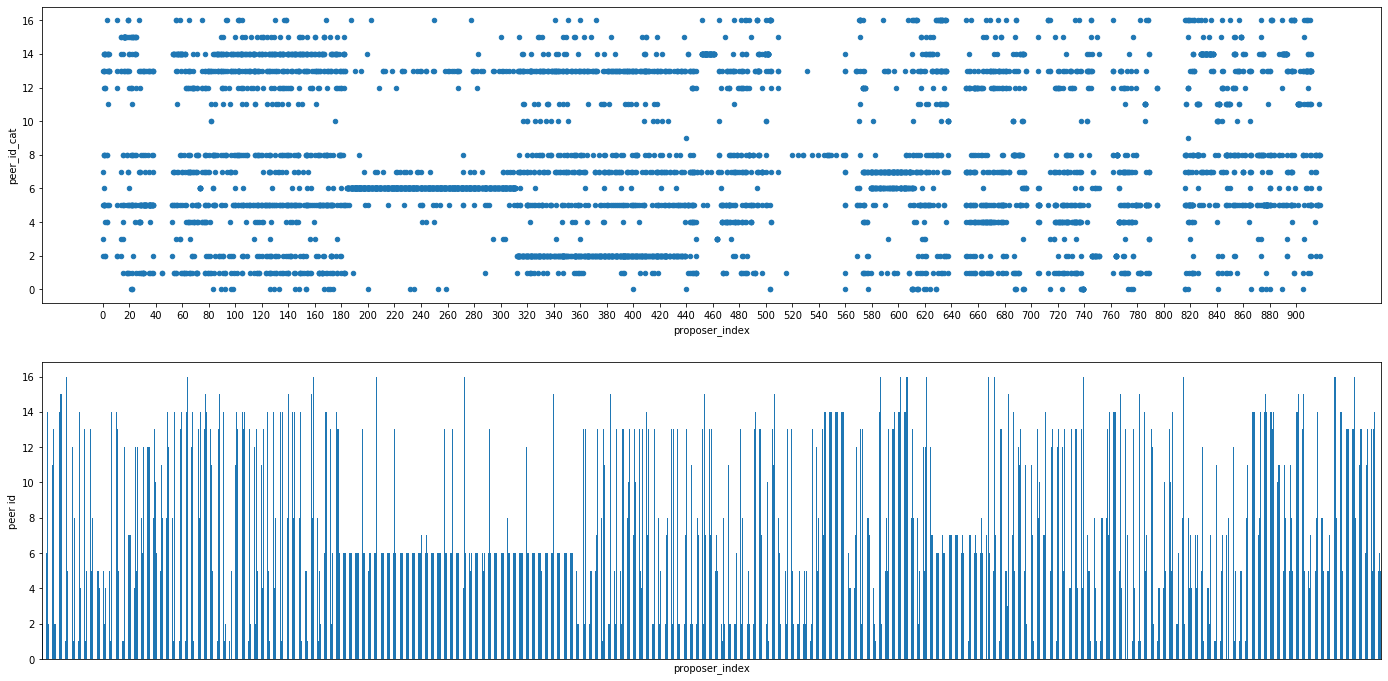

In [885]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
xticks=range(df_first['proposer_index'].min(),df_first['proposer_index'].max(),20)
ax[0]=df_foo.plot(kind='scatter',x='proposer_index',y='peer_id_cat',xticks=xticks,figsize=(24,12),ax=ax[0])
ax[1]=df_foo.plot(kind='bar',x='proposer_index',y='peer_id_cat',figsize=(24,12),ax=ax[1],legend=False)
ax[1].tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
ax[1]=ax[1].set_ylabel("peer id")


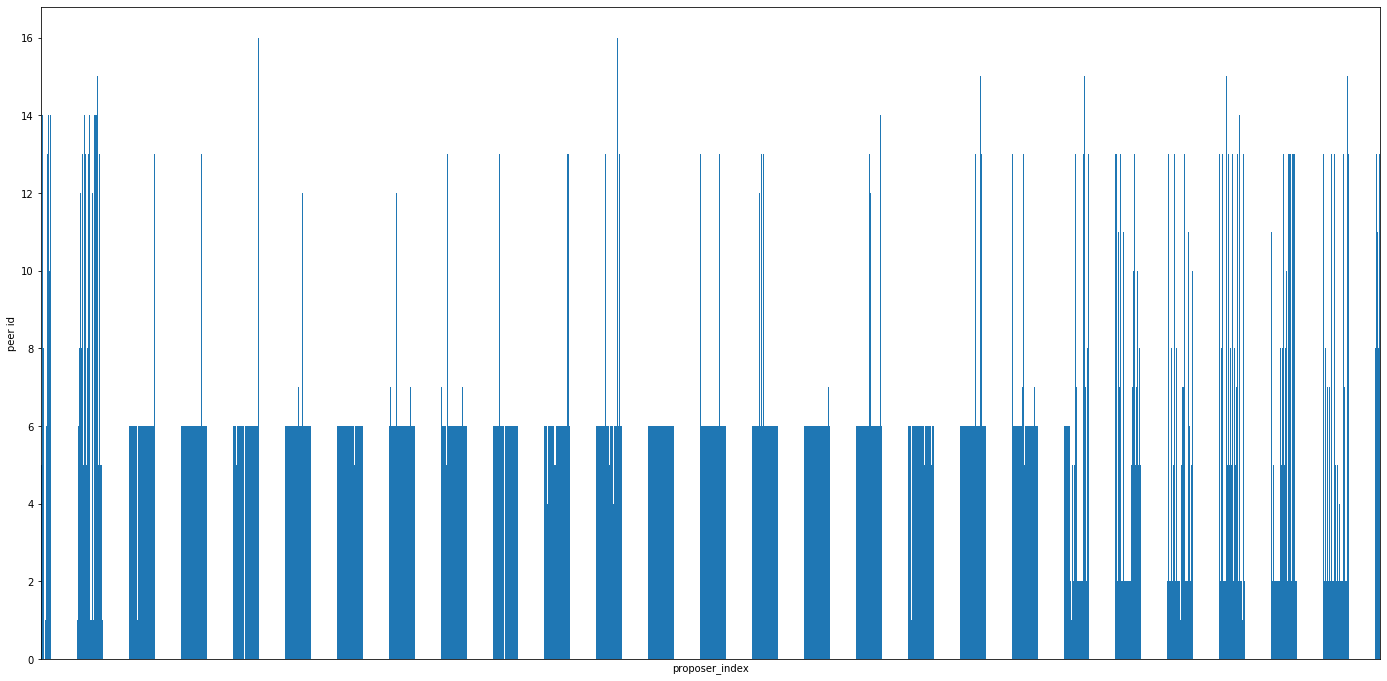

In [886]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(24,8))

ax=df_foo[(df_foo['proposer_index']>173) & (df_foo['proposer_index']<351)].plot(kind='bar',x='proposer_index',y='peer_id_cat',figsize=(24,12),ax=ax,legend=False)
ax.tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
ax=ax.set_ylabel("peer id")


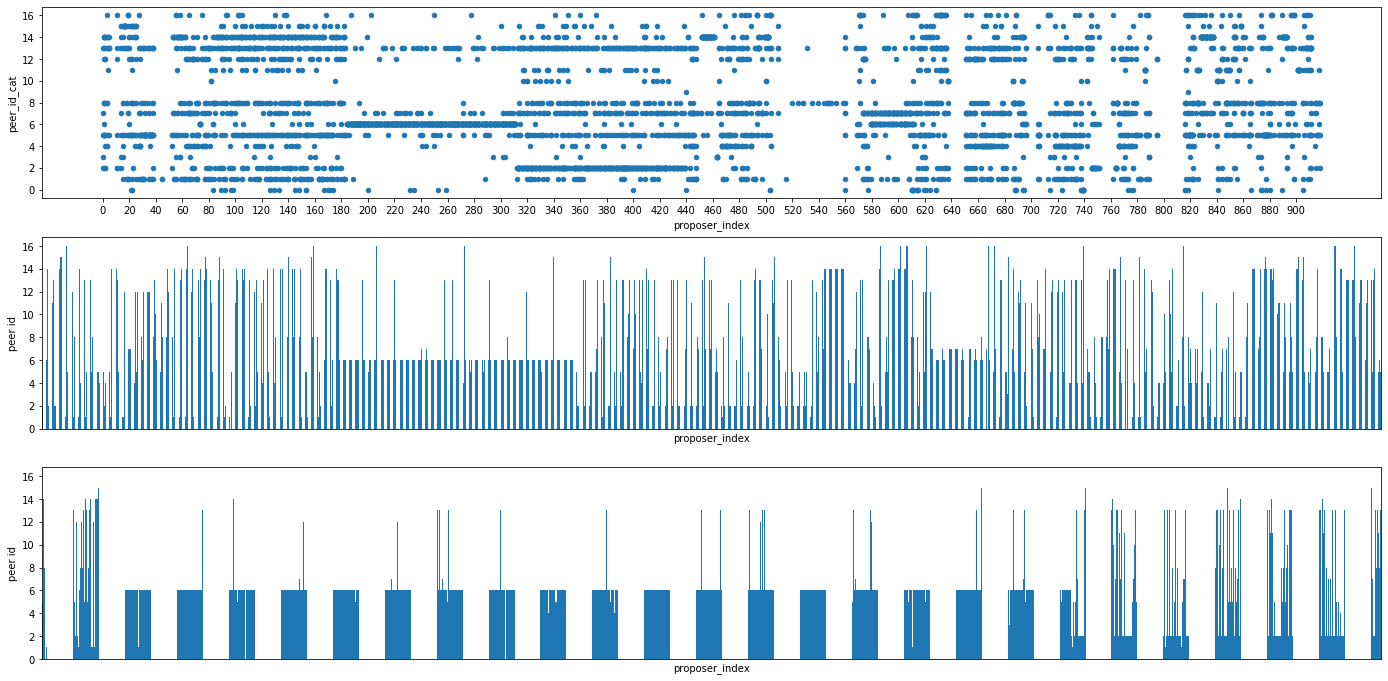

In [887]:
import matplotlib.pyplot as plt

       

fig, ax = plt.subplots(3)
xticks=range(df_first['proposer_index'].min(),df_first['proposer_index'].max(),20)


ax[0]=df_foo.plot(kind='scatter',x='proposer_index',y='peer_id_cat',xticks=xticks,figsize=(24,12),ax=ax[0])
ax[1]=df_foo.plot(kind='bar',x='proposer_index',y='peer_id_cat',figsize=(24,12),ax=ax[1],legend=False)
ax[1].tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
ax[1]=ax[1].set_ylabel("peer id")
#ax[1].set_xticklabels([t if not i%20 else "" for i,t in enumerate(ax[1].get_xticklabels())])
ax[2]=df_foo[(df_foo['proposer_index']>173) & (df_foo['proposer_index']<351)].plot(kind='bar',x='proposer_index',y='peer_id_cat',figsize=(24,12),ax=ax[2],legend=False)
ax[2].tick_params(axis = "x", which = "both", bottom = False, top = False, labelbottom=False)
ax[2]=ax[2].set_ylabel("peer id")


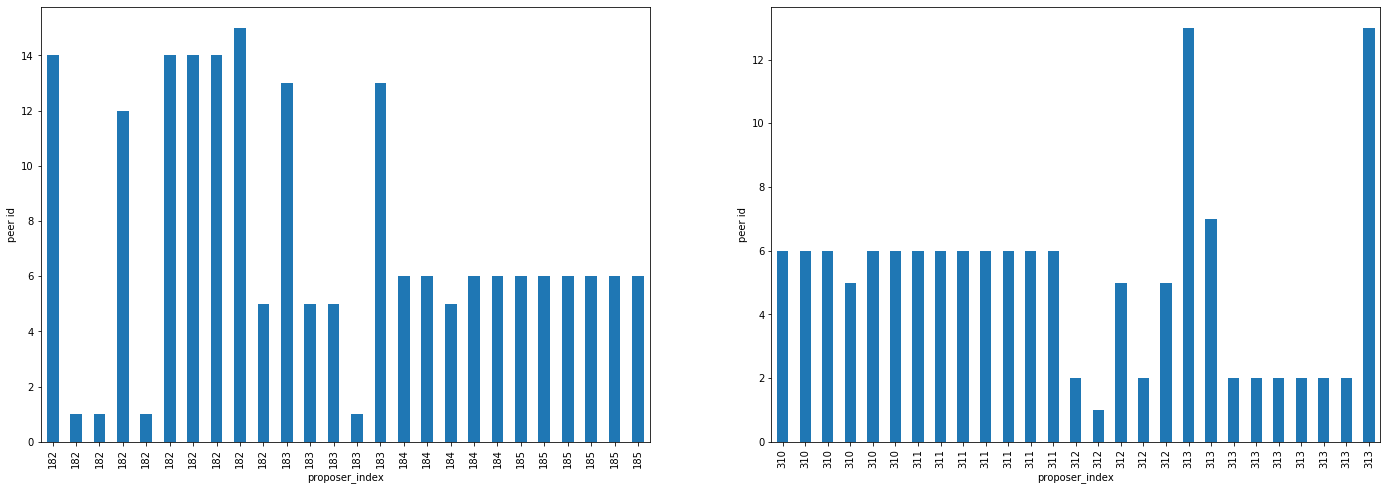

In [888]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(24,8))

ax[0]=df_foo[(df_foo['proposer_index']>181) & (df_foo['proposer_index']<186)].plot(kind='bar',x='proposer_index',y='peer_id_cat',ax=ax[0],legend=False)
ax[0]=ax[0].set_ylabel("peer id")
ax[1]=df_foo[(df_foo['proposer_index']>309) & (df_foo['proposer_index']<314)].plot(kind='bar',x='proposer_index',y='peer_id_cat',ax=ax[1],legend=False)
ax[1]=ax[1].set_ylabel("peer id")



In [968]:
import plotly.figure_factory as ff
df_gantt=df_foo.groupby(['peer_id_cat']).agg({'posix_timestamp':['min','max']})
df_gantt.columns = ['_'.join(col).strip() for col in df_gantt.columns.values]
df_gantt = df_gantt.reset_index()
df_gantt=df_gantt.rename(columns={'peer_id_cat':'Task'}) 
df_gantt=df_gantt.rename(columns={'posix_timestamp_min':'Start'}) 
df_gantt=df_gantt.rename(columns={'posix_timestamp_max':'Finish'}) 

starts=[]
finishes=[]
for start,finish in zip(df_gantt['Start'],df_gantt['Finish']):
    starts.append(pd.to_datetime(start, unit='s'))
    finishes.append(pd.to_datetime(finish, unit='s'))
df_gantt['Start']=starts
df_gantt['Finish']=finishes
fig = ff.create_gantt(df_gantt,showgrid_x=True, showgrid_y=True,title='Active Peers')
fig.show()

In [889]:
pd.set_option('display.max_rows', None)  
df_proposers = df_first.groupby('proposer_index')['relative_timestamp'].describe()
df_proposers.columns=[''.join(col).strip() for col in df_proposers.columns.values]
df_proposers = df_proposers.reset_index()
df_proposers[df_proposers['count']>1].sort_values('std')



proposer_index              count               mean                 std                min                25%                50%                 75%                 max
444  469            3.000000000000000  0.489333311716716  0.013650370993157   0.476999998092651  0.481999993324280  0.486999988555908  0.495499968528748   0.503999948501587  
659  786            8.000000000000000  0.321500003337860  0.014182472082420   0.305999994277954  0.311000049114227  0.319000005722046  0.328499913215637   0.348000049591064  
689  842            7.000000000000000  0.320142882210868  0.014622247653697   0.305999994277954  0.307500004768372  0.318000078201294  0.328999996185303   0.344000101089478  
507  585            3.000000000000000  0.680000066757202  0.015394780344593   0.667000055313110  0.671500086784363  0.676000118255615  0.686500072479248   0.697000026702881  
419  440            2.000000000000000  0.403499960899353  0.016263457315990   0.391999959945679  0.397749960422516  0.403499960899353  0.409249961376190   0.414999961853027  
0    0              5.000000000000000  0.400999975204468  0.016537854957547   0.372999906539917  0.400000095367432  0.407999992370605  0.408999919891357   0.414999961853027  
426  448            2.000000000000000  2.575500011444092  0.017677736964621   2.562999963760376  2.569249987602234  2.575500011444092  2.581750035285950   2.588000059127808  
480  528            2.000000000000000  0.032000064849854  0.018384792495240   0.019000053405762  0.025500059127808  0.032000064849854  0.038500070571899   0.045000076293945  
568  660            4.000000000000000  0.545000016689301  0.019612986489802   0.523999929428101  0.530749976634979  0.545500040054321  0.559750080108643   0.565000057220459  
359  380            5.000000000000000  0.868000030517578  0.019646848191971   0.841000080108643  0.861999988555908  0.867000102996826  0.875000000000000   0.894999980926514  
686  839            3.000000000000000  0.416666666666667  0.020033404714213   0.395999908447266  0.406999945640564  0.417999982833862  0.427000045776367   0.436000108718872  
745  914            3.000000000000000  0.282666603724162  0.020207308976008   0.270999908447266  0.270999908447266  0.270999908447266  0.288499951362610   0.305999994277954  
440  465            7.000000000000000  0.342000007629395  0.021275935274595   0.321000099182129  0.330500006675720  0.335999965667725  0.345499992370605   0.384999990463257  
508  586            8.000000000000000  0.669374972581863  0.022238568832260   0.642999887466431  0.655500054359436  0.663999915122986  0.678250014781952   0.704999923706055  
435  459            10.000000000000000 0.344799995422363  0.023639894992741   0.309999942779541  0.329000055789948  0.340999960899353  0.363000035285950   0.381999969482422  
506  584            4.000000000000000  0.644749999046326  0.026386483403048   0.607000112533569  0.638499975204468  0.651999950408936  0.658249974250793   0.667999982833862  
432  456            10.000000000000000 0.333599996566772  0.027366685588152   0.290999889373779  0.319750010967255  0.328499913215637  0.341500043869019   0.388000011444092  
434  458            6.000000000000000  0.331166664759318  0.027389160302843   0.302999973297119  0.320249974727631  0.321500062942505  0.334749996662140   0.381999969482422  
454  479            3.000000000000000  0.478333314259847  0.029535298861467   0.447999954223633  0.463999986648560  0.480000019073486  0.493499994277954   0.506999969482422  
596  691            5.000000000000000  2.435799932479858  0.029994980039259   2.398000001907349  2.415999889373779  2.438999891281128  2.450999975204468   2.474999904632568  
437  461            6.000000000000000  0.321833332379659  0.030649131165661   0.276999950408936  0.310999929904938  0.324000000953674  0.327250063419342   0.371000051498413  
697  852            6.000000000000000  0.513833363850911  0.030896067551633   0.457000017166138  0.511000037193298  0.518000006675720  0.531000077724457   

In [890]:
pd.reset_option('display.max_rows')

In [891]:
df_foo[df_foo['proposer_index']==544]

message_id  index            posix_timestamp                                                peer_id                                   topic  message_size    slot  proposer_index             slot_timestamp  relative_timestamp             timestamp                                                           node_id            ip4                  tcp4   udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no subnet_ids                                                                                                                                                                                                                                                   enr       coordinates  is_validator             distance  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max  peer_id_cat
3623  ALawIlUpD-ZjBkUrevKapjC0pQPox5NX0t86GLOXFMo=  64    1591807104.368999958038330  16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe  /eth2/f6775d07/beacon_block/ssz_snappy  2056          105792  544            1591807104.000000000000000 0.368999958038330    2020-06-15][11:06:18  38006854869cbddf9156a355869adefbd323273766cb2c179a13da83b45d1ce1  54.243.252.53 13000.000000000000000  13000 nan  nan   nan    113                18446744073709551615  f6775d07    5       []         enr:-LK4QKwRnRVb7lps_Q9516bAlSE-rmWYMdO8dO4GE74DiQ_ecpZ_F8I24fYCXiP1h-bitXDO0Tpr9II8QJSwU11DkUUFh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhDbz_DWJc2VjcDI1NmsxoQJjwXmPxs41IbsE-YdxM73EvSHbvyK8hCpg528lt6N6B4N0Y3CCMsiDdWRwgjLI  36.8080,-76.0284  False        1978.708742628404480  16                       1.153706983254831       0.368999958038330       4.020999908447266        8

In [892]:
df[df['peer_id']=="16Uiu2HAkzF51TQacV6wDFARNgmxCQMkvrBLZvHdN47Nge8RgbM8P"]

Empty DataFrame
Columns: [index, posix_timestamp, message_id, peer_id, topic, message_size, slot, proposer_index, slot_timestamp, relative_timestamp, timestamp, node_id, ip4, tcp4, udp4, ip6, tcp6, udp6, next_fork_version, next_fork_epoch, fork_digest, seq_no, subnet_ids, enr, coordinates, is_validator, distance]
Index: []

In [893]:
df_dht[df_dht["ip4"]=="176.9.51.216"]

index             timestamp                                                           node_id                                                peer_id           ip4                  tcp4   udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no                                                                                                                                                                                                                                              subnet_ids                                                                                                                                                                                                                                                   enr      coordinates
47   118    2020-06-15][11:06:18  46f62197df1eaff40819eb0f3067ce99b53c93691bb6e3f64b2705a023b8cb8f  16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  176.9.51.216 9500.000000000000000   9500   NaN nan   nan    113                18446744073709551615  f6775d07    65      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]  enr:-LK4QPcqaJDphyDSiYjHnyq-NOFqv-J9pPf2zhsx8haL0RjeBAtIs7m8RV8b-QfpdQHEmRDa7_ev0V7F1vtzigMn4DpBh2F0dG5ldHOI__________-EZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhLAJM9iJc2VjcDI1NmsxoQNe8ACI4KvKjv0tXo_FshDZPQgKo89OEgX2PS-PPq3A04N0Y3CCJRyDdWRwgiUc  51.1658,10.4216
98   21     2020-06-15][11:06:18  036e507bfb632f17c131874a061dacf6a43a195866321f653821f6e92b1e654c  16Uiu2HAkxVKcqXfKLjSccKrxzrhgiRYLDq5FwtHUgF42gFtZ6U98  176.9.51.216 30000.000000000000000  30000  NaN nan   nan    113                18446744073709551615  f6775d07    13      []                                                                                                                                                                                                                                                      enr:-KG4QO2XgvOUUNZUGPFgTK87T4jy09NTQxU5KEVAtu6JkSoSE5SB0sTWqkkzHDl7rCrGWBn72nl36mqQsyGg8UQD9IINhGV0aDKQ9nddBwAAARP__________4JpZIJ2NIJpcISwCTPYiXNlY3AyNTZrMaECLYJchUH6A-oyZenBKm5hLwIDy6xZqksxOt24irvEOEuDdGNwgnUwg3VkcIJ1MA                        51.1658,10.4216
166  136    2020-06-15][11:06:18  8aebe6380785115e00c797a08301f8297ff77dd069eab54b564b9da855a21dec  16Uiu2HAkzF51TQacV6wDFARNgmxCQMkvrBLZvHdN47Nge8RgbM8P  176.9.51.216 30500.000000000000000  30500  NaN nan   nan    113                18446744073709551615  f6775d07    4       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]  enr:-LK4QAwIXnTM_k1HMWbpvQmv5VZSpaQQAFKe30K_5AD1RJojQQS5NObWbTlhui8w_rdyErShrXzxw_KFkpA5XMgL6T8Eh2F0dG5ldHOI__________-EZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhLAJM9iJc2VjcDI1NmsxoQJHkxWWcBUgGufQe_P8wVF-vuE1yvKHWxpSMJSnUcZ_fIN0Y3CCdySDdWRwgnck  51.1658,10.4216
181  174    2020-06-15][11:06:18  d8b2233a0f4643e7a46f25ba8e63ac73468fec33679e42a842b178b452331346  16Uiu2HAmVdbP4HjJcCDfsBH1qYxAGh1Jpzzo3dH3rxosxvJiYN3h  176.9.51.216 30000.000000000000000  30000  NaN nan   nan    113                18446744073709551615  f6775d07    3       []                                                                                                                                                                                                                                                      enr:-KG4QIAxS8PHpqeoZl3LFavRx4k_UzpeTdfoQqCeGcDSpUHkavJjyGA9HdieluKI4PuL9G9wzrqPhg0d1FRfhZWYDN0DhGV0aDKQ9nddBwAAARP__________4JpZIJ2NIJpcISwCTPYiXNlY3AyNTZrMaED_DsgDiZLL0T11roS8xB4IutFn6hE9CEeEIMszRuglViDdGNwgnUwg3VkcIJ1MA                        51.1658,10.4216
214  65     2020-06-15][11:06:18  5bf439352688328455616f76fde674b625e141d3b

In [894]:
 list(set(df_outer['peer_id'].to_list()))

['16Uiu2HAmPvD41dmBsf6FYgqacPQ4B7FQk5copxwTTdMayMdProvj',
 '16Uiu2HAmBqaNcNitjW1kar4voXHhuHoJkfqr8yS4s1xCSqJVM3Vb',
 '16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr',
 '16Uiu2HAm31nBhqoBTZke4hCrsjJ6quC6wQ4jv3sVQZf6dt9PA5Ti',
 '16Uiu2HAmVKjTm3YePQgQLxm3fsfAUVgE58opRHZGDXRNLNsqvzBv',
 '16Uiu2HAmEM6HYXuMCeKUeMtmjYdQsz23MekUrp2TB3bADiijLj3e',
 '16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU',
 '16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U',
 '16Uiu2HAm295TBWmcnwmUTw3KJB3NQ7iGtWs2crUZvc1RKAPSZzLe',
 '16Uiu2HAm1x57ZN8ufTxe9NGfvwXmPi8yUYJpnM42eGhtq1zQBUtv',
 '16Uiu2HAkucMAVckq8yyLU51pbnzjTZ6JptPLKdpH5USBGuuvinHP',
 '16Uiu2HAmCuRqUMfpXa8ETkdNYN3vTFxbfRLoDsMjpPVunijbmYdu',
 '16Uiu2HAmUbV7rQw8Z573Dh7cQPFm8PTQzmfuQgYjLcinnfCwgGzr',
 '16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L',
 '16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m',
 '16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe',
 '16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa']

In [895]:
pd.reset_option('display.max_rows')
#16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU == 6, 176.9.51.216
#16Uiu2HAkuSxTRRBhHe2SP27zUiGtWThHeKVTBwj892BfesmBjd7U == 7, 47.186.101.185
df_foo[df_foo['peer_id_cat']==6]

message_id  index            posix_timestamp                                                peer_id                                   topic  message_size    slot  proposer_index             slot_timestamp  relative_timestamp             timestamp                                                           node_id           ip4                 tcp4  udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no                                                                                                                                                                                                                                              subnet_ids                                                                                                                                                                                                                                                   enr      coordinates  is_validator             distance  relative_timestamp_count  relative_timestamp_std  relative_timestamp_min  relative_timestamp_max  peer_id_cat
19    9dP1Zd_fl67pPEpWgPEkF9lT9Wouqiv-1woD4rYM-Lo=  46498 1591852128.473999977111816  16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  /eth2/f6775d07/beacon_block/ssz_snappy  1348          109544  1              1591852128.000000000000000 0.473999977111816    2020-06-15][11:06:18  46f62197df1eaff40819eb0f3067ce99b53c93691bb6e3f64b2705a023b8cb8f  176.9.51.216 9500.000000000000000  9500 nan  nan   nan    113                18446744073709551615  f6775d07    65      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]  enr:-LK4QPcqaJDphyDSiYjHnyq-NOFqv-J9pPf2zhsx8haL0RjeBAtIs7m8RV8b-QfpdQHEmRDa7_ev0V7F1vtzigMn4DpBh2F0dG5ldHOI__________-EZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhLAJM9iJc2VjcDI1NmsxoQNe8ACI4KvKjv0tXo_FshDZPQgKo89OEgX2PS-PPq3A04N0Y3CCJRyDdWRwgiUc  51.1658,10.4216  True         8326.311519941653387  14                       0.658194815819910       0.473999977111816       2.528000116348267        6          
111   0L4gSVmgBoJgdhuiXRXOP4APJha918pY0TKttR2_Qps=  46220 1591851816.540999889373779  16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  /eth2/f6775d07/beacon_block/ssz_snappy  2764          109518  20             1591851816.000000000000000 0.540999889373779    2020-06-15][11:06:18  46f62197df1eaff40819eb0f3067ce99b53c93691bb6e3f64b2705a023b8cb8f  176.9.51.216 9500.000000000000000  9500 nan  nan   nan    113                18446744073709551615  f6775d07    65      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]  enr:-LK4QPcqaJDphyDSiYjHnyq-NOFqv-J9pPf2zhsx8haL0RjeBAtIs7m8RV8b-QfpdQHEmRDa7_ev0V7F1vtzigMn4DpBh2F0dG5ldHOI__________-EZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhLAJM9iJc2VjcDI1NmsxoQNe8ACI4KvKjv0tXo_FshDZPQgKo89OEgX2PS-PPq3A04N0Y3CCJRyDdWRwgiUc  51.1658,10.4216  True         8326.311519941653387  14                       1.305798704307577       0.540999889373779       4.628000020980835        6          
415   CYcL4o3pKgEXobiIVZ-SUEX95gJoew-TAZ0rLX72K5U=  60587 1591867620.371999979019165  16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  /eth2/f6775d07/beacon_block/ssz_snappy  876           110835  73             1591867620.000000000000000 0.371999979019165    2020-06-15][11:06:18  46f62197df1eaff40819eb0f3067ce99b53c93691bb6e3f64b2705a023b8cb8f  176.9.51.216 9500.000000000000000  9500 nan  nan   nan    113                18446744073709551615  f6775d07    65      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 4

In [896]:
pd.set_option('display.max_rows', None)  
df_validator_registry[df_validator_registry["is_afri_key"]==1]

index                                                                                            pubkey  is_afri_key      client
84   84     99d4d30d4991ec8babd7d94650e48752c6f53757bcb0d764c9e2eb57ff0ebd5a13c44cc6b84efc4811d658fd62a60166  1            prysm     
85   85     b76a5fb15f6f6a8ea9708eccf75f011b0c9351cb32dae2637a6ec73bf4faaf8fe7c309e37fee2aaa1a4f9548fb9936d8  1            prysm     
86   86     ae3fa284dd6db1547fa2969fcb0e037e4c43b05955a5b11113ef03ab4827dcf984a2b413c596134d8449ee03aa1cbea9  1            prysm     
87   87     b125038474e2156b8cfbcd7f846137cddf52ee21d7f081cdc74a9f06760486d9415c991ea3279457c81e16ba1216bff7  1            prysm     
88   88     841b937d3373a5df617ba2b5f8ed22bc27e36d23e833df66e5d65df4f050fa1f33892079ee3de4987e2087bb93b7292d  1            prysm     
89   89     a9457a9901c00f009076db7cb9b98f98a8c9596bd4efa24c14a28bd053ab61898906d8c1db7711848f8a73b46023f60c  1            prysm     
90   90     b12b2d49a156b8701a1530b64bf0265dd28470ed4b7b9a54c8399adc71156aac423699477dc3ef81433833495185b772  1            prysm     
91   91     aa1d75dd327631e1bf731a68beafcdc59ec3537cb10d47e702c37ff7c27b320a80938f3c03629ae7af314f1ab1cdf7eb  1            prysm     
92   92     b38e8161a8fb269e47edb9c508e60baf3e3496d055747b1668bbf53ae58259eebf94b53e803da2f30a144f9b68c71470  1            prysm     
93   93     acf3e0076886881675e023791ea91737467f15100a4478648480cea5009e082f0d07c90dae958c7eeb66a96a660abb81  1            prysm     
94   94     8b785b9c5c03699d4c95a6ab88911004541a8ef98672c983db083173a5f4a9564c267678ed089b407dcd93054ffd3352  1            prysm     
95   95     ad9f265dd96c41d8f614b4ee72c230d4ed1423fc6ac501c2c22112d9c1d4e95cf15f3948a5a0733101025eec567e81f9  1            prysm     
96   96     93d3b75f224e4c4eeb2fed04271fd91b2cbb6384a59878713a1ea5e25e55f7b0336cbeb9172d2ada6ab5027ad0b05b55  1            prysm     
97   97     8d172262f426f593293575e5b5a600bf46dcd23bc5d60083baccfe1c18dc12c5028548730badebf72d45c458da9f2e9f  1            prysm     
98   98     a19a1ca1d5d8cfcc30bb5187c251fc1850925d5d9c2ba826cf9f5c33c7192b2da701e48408b9fa43254250ea236088c2  1            prysm     
99   99     894ea08dfa0d27812470d051613745e1be6e573a8689de1b72009ecf0bca6aae2d57622f81d713fbca905fb612935d89  1            prysm     
100  100    b3e67dd44281ce873f710045e0abe3a90d1fed6077dc905e31357110746059537eaef78f64cbff7a8e019ab1f1631f18  1            prysm     
101  101    a7ddac5495b5913d6b2086c019c2ae44bcde23c90a1467f4475353bcd58c5cfa5c46d380fbb254d7e2735c70edb44d46  1            prysm     
102  102    a6613406c0016d0f3a2a0e175c5300bc88f16dc6ceddc24ee4f722f13334eb2d72b843d855c8ae2c5bcd0f73cfd96c84  1            prysm     
103  103    8dd1cc4afbb6489da475ca59c3cd5308e4467d8fa8beb5a137abb49a2ea1d6a16a621f93bb219573bc8c808eb570e6d6  1            prysm     
104  104    b081a77ea416a83177d822d3b3abca89303836598512fb7dd4dea983090f94ab5e440f4f6da05812e720bc7821d55c5e  1            prysm     
105  105    a4658262d73db8d6a2f96dfe55c88752fe122e85384a0cb359a62325a9ecbc00509320b805a81aee7148d4e723a7aca1  1            prysm     
106  106    93b170f66cae5463232394ed878082f0be327006838b25f6d4fba9f288971f3018939202a8e39dfad2d51f4d2e5fac6f  1            prysm     
107  107    b87d6eeef548af139c4941e0c91c0cffa2b95215dd1ea7eb847f1f1a3648dfb0743e47309e00ed37403cbc2c4f3d7528  1            prysm     
108  108    8453e510099784f8604b013735a02f11127dddc4e03e8f64d9f88fdfbfc0bb559aed6d85c7fdf75367a6d4c579ca4377  1            prysm     
109  109    ac4597f0a4a1f00637b7b12f4da473cea5b2cc3de9982c74ef46c52a9c1fa9f2971bdc8a9f3e2e2da3c4bbcfc723e3cb  1            prysm     
110  110    af7eeb97cc6356dc5765ad9ed76073bbfc60c85d3e231f8e44d80b7391daa01c568854062894fcbc4e99387312f64a4b  1            prysm     
111  111    99baab264dd2a242853a79ba5db327e8e75579e83fbdd99fa4610954f8a814bf965f04d227df45d4b04a4c495d5599ff  1            prysm     
112  112    87cee2f4b9a3017af41f88113f39a997e32d257cd00f929336557ba72c94a18a7d4150cfed24dd6eea3074e4e3a99123  1        

In [897]:
df[df['proposer_index']==184]

index            posix_timestamp                                    message_id                                                peer_id                                   topic  message_size    slot  proposer_index             slot_timestamp  relative_timestamp             timestamp                                                           node_id             ip4                  tcp4   udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no                                                                                                                                                                                                                                              subnet_ids                                                                                                                                                                                                                                                     enr        coordinates  is_validator             distance
17926  17926 1591823064.632999897003174  UjBoWQbm_w0VhJWQ3b5LGrizhWOUP8N17rHob_ORsiQ=  16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  /eth2/f6775d07/beacon_block/ssz_snappy  1112          107122  184            1591823064.000000000000000 0.632999897003174    2020-06-15][11:06:18  46f62197df1eaff40819eb0f3067ce99b53c93691bb6e3f64b2705a023b8cb8f  176.9.51.216   9500.000000000000000   9500   NaN nan   nan    113                18446744073709551615  f6775d07    65      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]  enr:-LK4QPcqaJDphyDSiYjHnyq-NOFqv-J9pPf2zhsx8haL0RjeBAtIs7m8RV8b-QfpdQHEmRDa7_ev0V7F1vtzigMn4DpBh2F0dG5ldHOI__________-EZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhLAJM9iJc2VjcDI1NmsxoQNe8ACI4KvKjv0tXo_FshDZPQgKo89OEgX2PS-PPq3A04N0Y3CCJRyDdWRwgiUc    51.1658,10.4216    True         8326.311519941653387
17927  17927 1591823064.779999971389771  UjBoWQbm_w0VhJWQ3b5LGrizhWOUP8N17rHob_ORsiQ=  16Uiu2HAmTXz3fiywgagb1wLE3eFBFqYUjwgAgijetQyq7SayYf1L  /eth2/f6775d07/beacon_block/ssz_snappy  1112          107122  184            1591823064.000000000000000 0.779999971389771    2020-06-15][11:06:18  269b6baecbee30a92928955bc6908512d01b225955b88e8c920ec369fc2605a6  54.235.83.194  13000.000000000000000  13000  NaN nan   nan    113                18446744073709551615  f6775d07    7       []                                                                                                                                                                                                                                                      enr:-LK4QAWPjZDsaRdKDrtkgZd3v0PAhpGMPz1-m_W1S3T4Id5wa0zhFhPLG-zn_VjPDuvZ5CmlclcGEECKtd7Fep7_220Hh2F0dG5ldHOIAAAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhDbrU8KJc2VjcDI1NmsxoQPdE-ULWF6-6N5_nm0AEwgH2DRVHUFZbfK3Wo-t3yOio4N0Y3CCMsiDdWRwgjLI    36.8080,-76.0284   False        1978.708742628404480
17928  17928 1591823064.910000085830688  UjBoWQbm_w0VhJWQ3b5LGrizhWOUP8N17rHob_ORsiQ=  16Uiu2HAm8Cv8tCXbAaV9MfvUuTP7BF5y1pZXRainP5VxkpVvZnZa  /eth2/f6775d07/beacon_block/ssz_snappy  1112          107122  184            1591823064.000000000000000 0.910000085830688    2020-06-15][11:06:18  0096cdf94b72097a2accbe2f53396d97a5adbb255e3de2dcf5c856bde6dcdc85  138.68.12.21   9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    9       [13]                                                                                                                                                                                                                                                    enr:-LK4QIqTXvroJqUG2oYGLNxQOO1ES2SdVsWZPUTX37jAotE7clLRrHgkPSiD4mAl6Yr4uehq6mLc8Jdm-677f1ccUQMJh2F0dG5ldHOIACAAAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhIpEDBWJc2VjcDI1NmsxoQK942L3MMtkXJCkpLKa

In [898]:
list(set(df_foo[df_foo['peer_id_cat']==2]['peer_id'].to_list()))[0]

'16Uiu2HAmD2SAQRGmXTaZF3eFqpzqyvUdr9Ds6qRU8ZuQtLq34iRr'

In [899]:
df[df["peer_id"]=="16Uiu2HAkzF51TQacV6wDFARNgmxCQMkvrBLZvHdN47Nge8RgbM8P"]

Empty DataFrame
Columns: [index, posix_timestamp, message_id, peer_id, topic, message_size, slot, proposer_index, slot_timestamp, relative_timestamp, timestamp, node_id, ip4, tcp4, udp4, ip6, tcp6, udp6, next_fork_version, next_fork_epoch, fork_digest, seq_no, subnet_ids, enr, coordinates, is_validator, distance]
Index: []

In [932]:
df['posix_timestamp'].min(),df['posix_timestamp'].max()

(1591807044.339, 1591892238.449)

In [950]:
df[df['message_size']==10204]

index            posix_timestamp                                    message_id                                                peer_id                                   topic  message_size    slot  proposer_index             slot_timestamp  relative_timestamp             timestamp                                                           node_id             ip4                  tcp4   udp4  ip6  tcp6  udp6  next_fork_version       next_fork_epoch fork_digest  seq_no                                                                                                                                                                                                                                              subnet_ids                                                                                                                                                                                                                                                     enr       coordinates  is_validator             distance
45002  45002 1591850450.545000076293945  XI6x0HIBzWL1D6f4gTGzh1GSbWBzBdTs2hoxq8iuOPI=  16Uiu2HAmPgSLr36xcCqsm7nZ7ueiqzJ74KG3bpYV7jvGwHzpAGVe  /eth2/f6775d07/beacon_block/ssz_snappy  10204         109404  116            1591850448.000000000000000 2.545000076293945    2020-06-15][11:06:18  c92a4a9c4f2cc1e5126b931054dc8eca3851aa712cda6d68bee14139a07118b8  116.203.229.96 9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    11      [21]                                                                                                                                                                                                                                                    enr:-LK4QH50BW2RBpvcZSY-OTh5bGU2KqtUgjULaWW-Da_CzOyHdf9IuSrvvccJfnRBARNQ4i9MBj31HaFf7RsxUS0O43kLh2F0dG5ldHOIAAAgAAAAAACEZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhHTL5WCJc2VjcDI1NmsxoQOjz4bSLkwDR_BJNh3TU-_7ZFkcbsiZ-U2tAp67iIwRkYN0Y3CCIyiDdWRwgiMo    49.1166,10.7597   True         8474.796583896340962
45003  45003 1591850450.874000072479248  XI6x0HIBzWL1D6f4gTGzh1GSbWBzBdTs2hoxq8iuOPI=  16Uiu2HAmNU5LnMBkM6xsXEnBBLiLqXefJoxmkbgNmFamDkJQeQ7m  /eth2/f6775d07/beacon_block/ssz_snappy  10204         109404  116            1591850448.000000000000000 2.874000072479248    2020-06-15][11:06:18  497bd516c05e1794aaa5507121f21afef88f26ff63239c39aee4ac26513c6ce1  51.210.9.77    9000.000000000000000   9000   NaN nan   nan    113                18446744073709551615  f6775d07    191     [7, 14, 30, 31, 34, 43, 44, 45, 53, 60]                                                                                                                                                                                                                 enr:-LO4QFls-UvyaDI2kaVOlGaJRoI3PDMoYBfGn_O97VfuIqTldmDebthx7QrHjjh9tY0dzry1mIMmJoVUpDkfG7i6CvOBv4dhdHRuZXRziIBAAMAEOCAQhGV0aDKQ9nddBwAAARP__________4JpZIJ2NIJpcIQz0glNiXNlY3AyNTZrMaEDkckfvhGY422gVDeqDkHYYynOi6zauDk27RsdMiHAzFyDdGNwgiMog3VkcIIjKA  48.5839,7.7455    True         8323.677840043908873
45004  45004 1591850451.187000036239624  XI6x0HIBzWL1D6f4gTGzh1GSbWBzBdTs2hoxq8iuOPI=  16Uiu2HAmK3aw5p4Uw7RYRFeUcL4u1pg3u6JN8MnyT5wRshNLvHqU  /eth2/f6775d07/beacon_block/ssz_snappy  10204         109404  116            1591850448.000000000000000 3.187000036239624    2020-06-15][11:06:18  46f62197df1eaff40819eb0f3067ce99b53c93691bb6e3f64b2705a023b8cb8f  176.9.51.216   9500.000000000000000   9500   NaN nan   nan    113                18446744073709551615  f6775d07    65      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]  enr:-LK4QPcqaJDphyDSiYjHnyq-NOFqv-J9pPf2zhsx8haL0RjeBAtIs7m8RV8b-QfpdQHEmRDa7_ev0V7F1vtzigMn4DpBh2F0dG5ldHOI__________-EZXRoMpD2d10HAAABE___________gmlkgnY0gmlwhLAJM9iJc2VjcDI1NmsxoQNe8ACI4KvKjv0tXo_FshD